# 한국 부동산 분석
![한국부동산구성도](한국부동산구성도.png)
- 한국 부동산 구성도

## Basic Step
### - setting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm

# 그래프 설정
plt.rcParams["figure.figsize"] = (15,9)
plt.rcParams['font.family'] = 'Malgun Gothic'     # '맑은 고딕'으로 설정  
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
# 부동산 기간 나누기
president = pd.DataFrame({'대통령':['이명박','박근혜','문재인'],
            '취임':[datetime.date(2008, 2, 25), datetime.date(2013, 2, 25), datetime.date(2017, 5, 10)]})

# x축이 필요한 경우
Day1 = pd.DataFrame({"날짜_2102" : pd.date_range(start='2006/01/01',end='2021/02/01', freq='MS')})
Day2 = pd.DataFrame({"날짜_2103" : pd.date_range(start='2006/01/01',end='2021/03/01', freq='MS')})
Day3 = pd.DataFrame({"날짜_2104" : pd.date_range(start='2006/01/01',end='2021/04/01', freq='MS')})
Day4 = pd.DataFrame({"날짜_1107" : pd.date_range(start='2011/07/01',end='2021/03/01', freq='MS')})
Day5 = pd.DataFrame({"Day" : pd.date_range(start='2006/01/01',end='2020/12/01', freq='QS')})

## 1st Step [ 부동산 시장 확인 ]
### - 주택 매매 가격 지수 그래프

In [5]:
house_price = pd.read_csv('주택매매가격지수(2019.01=100).csv', encoding='CP949', index_col = "Day", header=0, engine='python')
house_price

,총지수,단독주택,연립주택,아파트
Day,,,,
06-Jan,67.559,77.884,66.004,64.872
06-Feb,67.865,77.957,66.205,65.276
06-Mar,68.300,78.176,66.555,65.808
06-Apr,68.904,78.563,67.060,66.508
06-May,69.608,79.037,67.582,67.335
...,...,...,...,...
20-Dec,108.586,104.909,107.237,109.346
21-Jan,109.878,105.303,107.895,111.005
21-Feb,111.375,105.718,108.706,112.957


In [4]:
house_price["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/04/01', freq='MS'))
house_price = house_price.drop(["Day"], axis = 1)  # Day 열 제거
house_price.set_index('날짜', inplace=True) # "날짜를 인덱스로"
house_price

,총지수,단독주택,연립주택,아파트
날짜,,,,
2006-01-01,67.559,77.884,66.004,64.872
2006-02-01,67.865,77.957,66.205,65.276
2006-03-01,68.300,78.176,66.555,65.808
2006-04-01,68.904,78.563,67.060,66.508
2006-05-01,69.608,79.037,67.582,67.335
...,...,...,...,...
2020-12-01,108.586,104.909,107.237,109.346
2021-01-01,109.878,105.303,107.895,111.005
2021-02-01,111.375,105.718,108.706,112.957


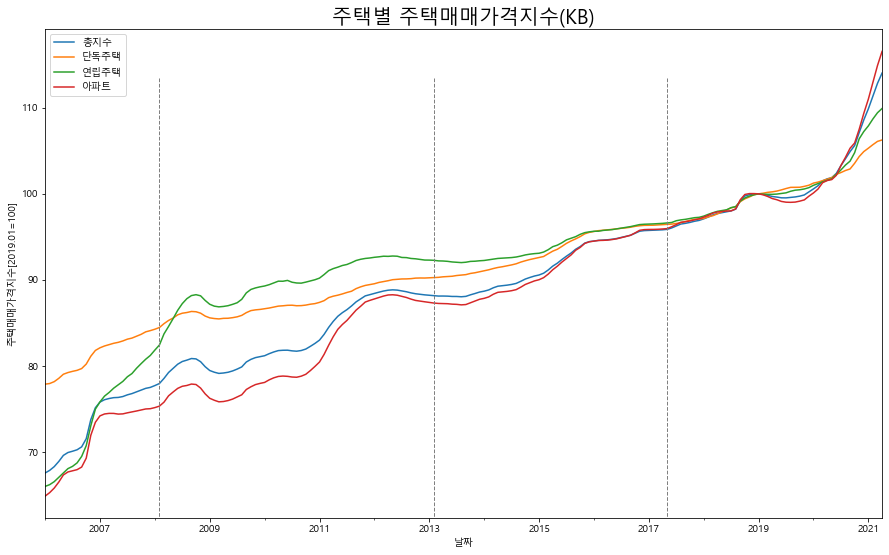

In [4]:
house_price.plot()
plt.title("주택별 주택매매가격지수(KB)", fontsize=20)
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.ylabel("주택매매가격지수[2019.01=100]")
plt.show()

### - 아파트 실 거래가 그래프

In [5]:
apartment = pd.read_csv('아파트실거래가(2017.11=100).csv', encoding='CP949', header=0, engine='python')
apartment["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/02/01', freq='MS'))
apartment = apartment.drop(["Day"], axis = 1)  # Day 열 제거
apartment

,전국,수도권,지방,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,날짜
0,62.0,65.4,59.1,60.7,49.7,62.5,62.4,54.2,76.1,48.9,69.2,61.2,65.2,75.4,57.0,51.0,66.3,63.0,38.7,2006-01-01
1,62.7,66.6,59.2,61.7,49.5,62.6,62.8,53.9,75.6,49.0,70.5,61.8,66.4,76.2,57.3,50.7,66.3,62.9,37.6,2006-02-01
2,63.3,67.7,59.2,63.2,49.1,62.4,63.2,53.8,74.9,49.8,71.4,59.9,66.9,77.0,58.0,51.1,66.4,63.2,35.8,2006-03-01
3,63.8,68.4,59.2,64.1,48.6,62.3,63.7,53.7,74.3,50.4,72.2,60.8,67.7,77.0,58.3,51.5,66.2,62.8,36.0,2006-04-01
4,64.1,69.0,59.1,64.2,48.2,61.9,64.1,53.0,73.8,51.6,73.2,61.8,67.3,75.0,58.4,52.7,66.2,62.7,36.5,2006-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,115.6,130.8,103.1,151.5,102.3,115.4,111.6,118.4,134.8,95.5,122.7,93.8,94.8,98.5,97.8,107.6,90.3,89.1,93.1,2020-10-01
178,118.3,133.3,106.1,153.9,108.3,119.3,112.8,121.5,136.8,99.9,125.6,93.7,95.5,99.7,99.7,107.8,92.0,91.6,94.3,2020-11-01
179,121.4,136.6,109.3,157.0,114.0,124.3,114.9,123.3,138.4,103.6,129.2,95.7,97.1,101.7,101.9,108.1,95.7,94.7,96.4,2020-12-01
180,124.9,141.8,111.6,161.8,115.1,129.3,118.5,125.0,142.1,106.0,134.8,98.9,99.0,103.7,103.7,108.7,97.3,96.3,97.1,2021-01-01


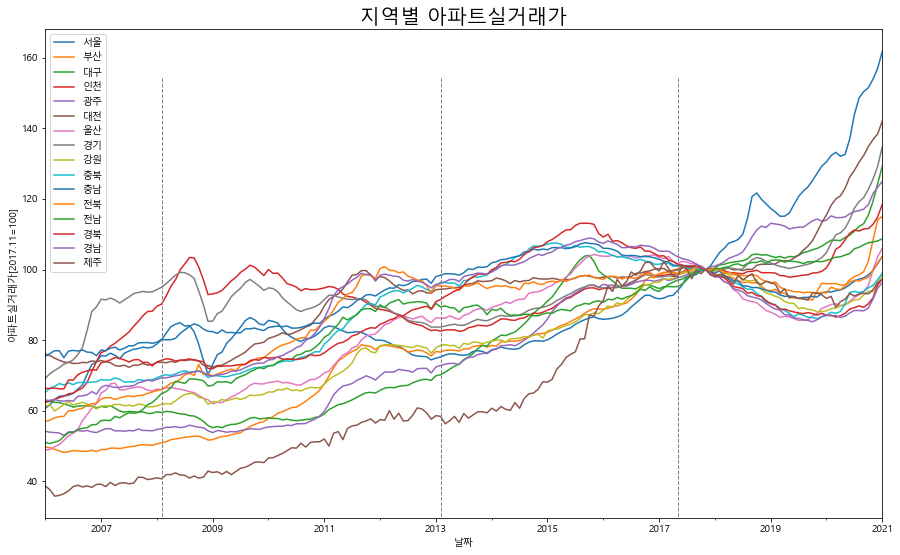

In [6]:
apartment.dropna(inplace=True) # 결측치 제거
apartment1 = apartment.drop(["전국", "수도권", "지방"], axis = 1)  #전국, 수도권, 지방 열 제거
apartment1.set_index('날짜', inplace=True)
apartment1.plot()
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("지역별 아파트실거래가", fontsize=20)
plt.ylabel("아파트실거래가[2017.11=100]")
plt.show() 

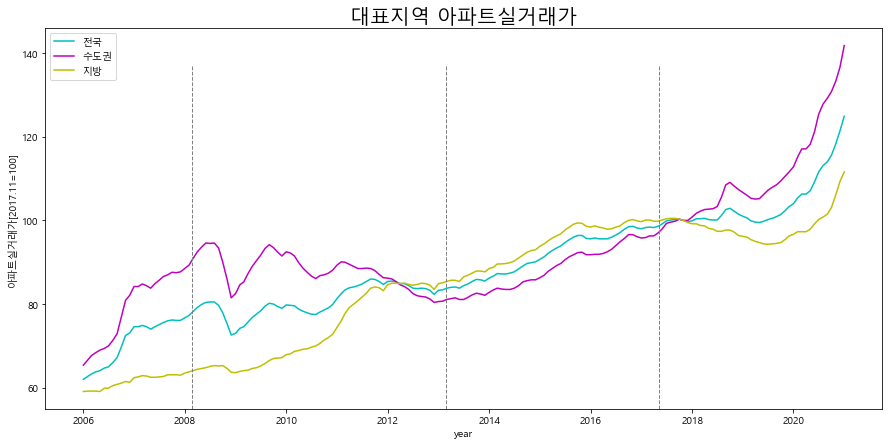

In [7]:
x = apartment["날짜"]
y1 = apartment["전국"]
y2 = apartment["수도권"]
y3 = apartment["지방"]

plt.figure(figsize=(15,7))
plt.plot(x, y1, color='c', label='전국')
plt.plot(x, y2, color='m', label='수도권')
plt.plot(x, y3, color='y', label='지방')
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("대표지역 아파트실거래가", fontsize=20)
plt.legend()
plt.xlabel("year")
plt.ylabel("아파트실거래가[2017.11=100]")
plt.show()

- 이명박 정부때 빼고는 아파트, 주택의 가격은 계속 상승하는 것을 알 수 있다. 그러나 2019년 이후부터 조금 더 가파르게 상승하는 것을 알 수 있다.

## 2nd Step [ 부동산 관련 시장 확인] 
### - 건축 허가조사(동수)

In [8]:
building_agree = pd.read_csv('건축허가_동수(동수).csv', encoding='CP949', header=0, engine='python')
building_agree

,Day,주거용[동],상업용[동],공업용[동],교육 및 사회용[동],기타[동]
0,06-Jan,1382,1921,1477,404,1399
1,06-Feb,2296,2309,1429,528,1459
2,06-Mar,3581,3571,2354,633,2468
3,06-Apr,3778,3277,1789,630,2571
4,06-May,4113,3441,1891,617,2608
...,...,...,...,...,...,...
177,20-Oct,6004,4295,1201,531,4049
178,20-Nov,6010,4541,1315,501,4342
179,20-Dec,5419,4057,1188,583,3555
180,21-Jan,3430,2835,805,434,2803


In [9]:
# index 변경
building_agree = building_agree.drop(["Day", "기타[동]"], axis = 1)  # Day 열 제거
building_agree["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/02/01', freq='MS'))
building_agree.set_index('날짜', inplace=True)
building_agree

,주거용[동],상업용[동],공업용[동],교육 및 사회용[동]
날짜,,,,
2006-01-01,1382,1921,1477,404
2006-02-01,2296,2309,1429,528
2006-03-01,3581,3571,2354,633
2006-04-01,3778,3277,1789,630
2006-05-01,4113,3441,1891,617
...,...,...,...,...
2020-10-01,6004,4295,1201,531
2020-11-01,6010,4541,1315,501
2020-12-01,5419,4057,1188,583


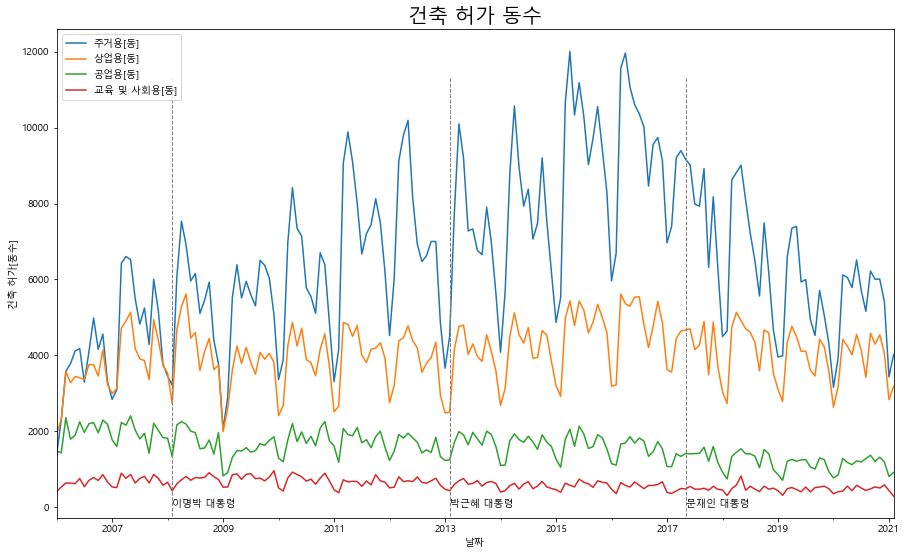

In [10]:
building_agree.plot()
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.text(president[president['대통령']=='이명박'].취임.item(), 0, "이명박 대통령")
plt.text(president[president['대통령']=='박근혜'].취임.item(), 0, "박근혜 대통령") 
plt.text(president[president['대통령']=='문재인'].취임.item(), 0, "문재인 대통령") 
plt.title("건축 허가 동수", fontsize=20)
plt.ylabel("건축 허가[동수]")
plt.show() 

### - 건축 허가조사(연면적)

In [11]:
area_agree = pd.read_csv('건축허가_연면적(m2).csv', encoding='CP949', header=0, engine='python')
area_agree

,Day,주거용[㎡],상업용[㎡],공업용[㎡],교육 및 사회용[㎡],기타[㎡]
0,06-Jan,1016271,1155951,982407,363926,497451
1,06-Feb,2635073,1447377,1089579,436441,819789
2,06-Mar,2203712,1763000,1348099,649087,1058935
3,06-Apr,2821968,1744658,1310982,617645,1124610
4,06-May,2559673,1897762,1153123,682428,1107667
...,...,...,...,...,...,...
177,20-Oct,3279774,2402944,1250233,459896,1927478
178,20-Nov,3814695,3383591,1715891,915248,2602435
179,20-Dec,5071607,2799017,1556870,550184,3086062
180,21-Jan,2896893,1875366,977904,359106,1531529


In [12]:
# index 변경
area_agree = area_agree.drop(["Day", "기타[㎡]"], axis = 1)  # Day 열 제거
area_agree["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/02/01', freq='MS'))
area_agree.set_index('날짜', inplace=True)
area_agree

,주거용[㎡],상업용[㎡],공업용[㎡],교육 및 사회용[㎡]
날짜,,,,
2006-01-01,1016271,1155951,982407,363926
2006-02-01,2635073,1447377,1089579,436441
2006-03-01,2203712,1763000,1348099,649087
2006-04-01,2821968,1744658,1310982,617645
2006-05-01,2559673,1897762,1153123,682428
...,...,...,...,...
2020-10-01,3279774,2402944,1250233,459896
2020-11-01,3814695,3383591,1715891,915248
2020-12-01,5071607,2799017,1556870,550184


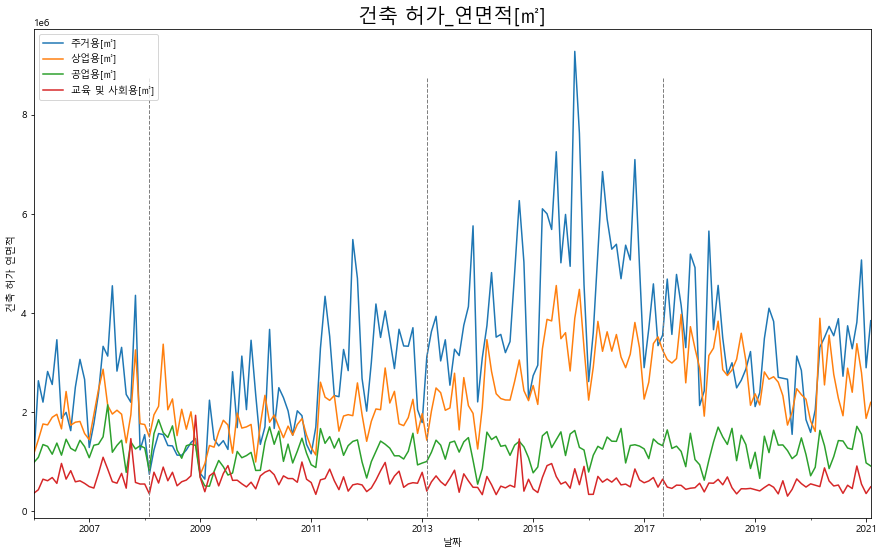

In [13]:
area_agree.plot()
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("건축 허가_연면적[㎡]", fontsize=20)
plt.ylabel("건축 허가 연면적")
plt.show()

- 건축 허가는 박근혜 정부때 가장 많이 허가되었다. 그래프가 계속 증가하다 2016년부터 감소하는 것을 알 수 있다.

### - 주택 매매 가격과 건축 허가 회귀 분석

In [14]:
# 건축 허가 동수와 건축 허가 연면적 통합
construction_permission = building_agree.join(area_agree)

# 건축 허가와 주택 매매 가격 총 지수 통합
construction_permission = construction_permission.join(house_price ["총지수"].iloc[0:182])
construction_permission.rename(columns = {"총지수": "주택 매매 가격 총지수"}, inplace = True) # column 이름 바꾸기
construction_permission

,주거용[동],상업용[동],공업용[동],교육 및 사회용[동],주거용[㎡],상업용[㎡],공업용[㎡],교육 및 사회용[㎡],주택 매매 가격 총지수
날짜,,,,,,,,,
2006-01-01,1382,1921,1477,404,1016271,1155951,982407,363926,67.559
2006-02-01,2296,2309,1429,528,2635073,1447377,1089579,436441,67.865
2006-03-01,3581,3571,2354,633,2203712,1763000,1348099,649087,68.300
2006-04-01,3778,3277,1789,630,2821968,1744658,1310982,617645,68.904
2006-05-01,4113,3441,1891,617,2559673,1897762,1153123,682428,69.608
...,...,...,...,...,...,...,...,...,...
2020-10-01,6004,4295,1201,531,3279774,2402944,1250233,459896,105.611
2020-11-01,6010,4541,1315,501,3814695,3383591,1715891,915248,107.125
2020-12-01,5419,4057,1188,583,5071607,2799017,1556870,550184,108.586


In [15]:
construction_permission.corr() 

,주거용[동],상업용[동],공업용[동],교육 및 사회용[동],주거용[㎡],상업용[㎡],공업용[㎡],교육 및 사회용[㎡],주택 매매 가격 총지수
주거용[동],1.000000,0.846309,0.317587,0.171534,0.737120,0.714406,0.510210,0.174278,0.343023
상업용[동],0.846309,1.000000,0.514419,0.394758,0.580428,0.697714,0.714436,0.326227,0.219594
공업용[동],0.317587,0.514419,1.000000,0.722130,0.130436,0.056440,0.583170,0.463172,-0.610278
교육 및 사회용[동],0.171534,0.394758,0.722130,1.000000,-0.048470,-0.132732,0.321045,0.483552,-0.563105
주거용[㎡],0.737120,0.580428,0.130436,-0.048470,1.000000,0.733226,0.345041,0.058360,0.430978
상업용[㎡],0.714406,0.697714,0.056440,-0.132732,0.733226,1.000000,0.469356,0.086801,0.541582
공업용[㎡],0.510210,0.714436,0.583170,0.321045,0.345041,0.469356,1.000000,0.266886,0.043413
교육 및 사회용[㎡],0.174278,0.326227,0.463172,0.483552,0.058360,0.086801,0.266886,1.000000,-0.256799
주택 매매 가격 총지수,0.343023,0.219594,-0.610278,-0.563105,0.430978,0.541582,0.043413,-0.256799,1.000000


In [16]:
# sns.pairplot(construction_permission, hue='총지수')

<AxesSubplot:>

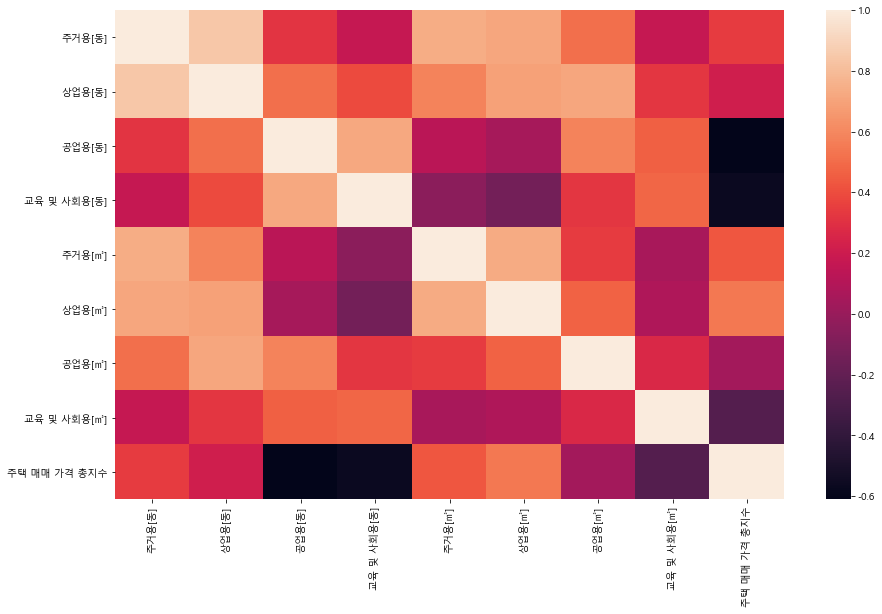

In [17]:
sns.heatmap(construction_permission.corr())

- heatmap 색이 조금 밝은 주거용, 상업용 건축허가는 주택 매매 가격 총 지수와 상관관계가 조금 있다고 보인다. 

- 동 수 보다는 면적이 더 상관관계가 있다는 것을 알 수 있다.

In [18]:
#공백있는 column 이름 처리 
construction_permission.columns = [c.replace(' ', '_') for c in construction_permission.columns]
construction_permission

,주거용[동],상업용[동],공업용[동],교육_및_사회용[동],주거용[㎡],상업용[㎡],공업용[㎡],교육_및_사회용[㎡],주택_매매_가격_총지수
날짜,,,,,,,,,
2006-01-01,1382,1921,1477,404,1016271,1155951,982407,363926,67.559
2006-02-01,2296,2309,1429,528,2635073,1447377,1089579,436441,67.865
2006-03-01,3581,3571,2354,633,2203712,1763000,1348099,649087,68.300
2006-04-01,3778,3277,1789,630,2821968,1744658,1310982,617645,68.904
2006-05-01,4113,3441,1891,617,2559673,1897762,1153123,682428,69.608
...,...,...,...,...,...,...,...,...,...
2020-10-01,6004,4295,1201,531,3279774,2402944,1250233,459896,105.611
2020-11-01,6010,4541,1315,501,3814695,3383591,1715891,915248,107.125
2020-12-01,5419,4057,1188,583,5071607,2799017,1556870,550184,108.586


### - 미분양 주택 그래프

In [19]:
unsold = pd.read_csv('미분양주택(호).csv', encoding='CP949', header=0, engine='python')
unsold["날짜"] = pd.DataFrame(pd.date_range(start='2007/01/01',end='2021/02/01', freq='MS'))
unsold = unsold.drop(["Day"], axis = 1)  # Day 열 제거
unsold

,전국,수도권,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,날짜
0,75616,4544,697,8680,9467,243,7005,819,1180,3604,5312,2548,7449,5179,5374,6210,11772,77,2007-01-01
1,73619,4263,590,8653,9134,312,6246,803,1210,3361,5344,2645,7363,5098,5253,5948,11563,96,2007-02-01
2,73162,3532,687,8548,9189,266,5905,1048,1687,2579,5801,2565,7446,5184,4887,5854,11328,188,2007-03-01
3,73393,3392,685,8074,9009,219,5829,1020,1521,2488,5460,3632,8250,4812,4664,5419,12149,162,2007-04-01
4,78571,3554,704,7964,10888,362,7842,957,1500,2488,5212,4012,9195,4625,4640,6303,11723,156,2007-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,26703,3607,52,1262,1143,822,245,832,474,2733,2884,307,3235,444,1073,2922,7042,1233,2020-10-01
166,23620,3183,52,1084,667,691,88,831,473,2440,2648,275,3582,400,1059,2541,5581,1208,2020-11-01
167,19005,2131,49,973,280,466,31,638,468,1616,3115,273,2510,661,1059,2154,3617,1095,2020-12-01
168,17130,1861,49,944,419,245,307,635,438,1567,2671,234,2061,251,1046,2049,2964,1250,2021-01-01


In [20]:
# index 변경
unsold1 = unsold.drop(["전국", "수도권"], axis = 1)  # Day 열 제거
unsold1.set_index('날짜', inplace=True)
unsold1

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,
2007-01-01,697,8680,9467,243,7005,819,1180,3604,5312,2548,7449,5179,5374,6210,11772,77
2007-02-01,590,8653,9134,312,6246,803,1210,3361,5344,2645,7363,5098,5253,5948,11563,96
2007-03-01,687,8548,9189,266,5905,1048,1687,2579,5801,2565,7446,5184,4887,5854,11328,188
2007-04-01,685,8074,9009,219,5829,1020,1521,2488,5460,3632,8250,4812,4664,5419,12149,162
2007-05-01,704,7964,10888,362,7842,957,1500,2488,5212,4012,9195,4625,4640,6303,11723,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,52,1262,1143,822,245,832,474,2733,2884,307,3235,444,1073,2922,7042,1233
2020-11-01,52,1084,667,691,88,831,473,2440,2648,275,3582,400,1059,2541,5581,1208
2020-12-01,49,973,280,466,31,638,468,1616,3115,273,2510,661,1059,2154,3617,1095


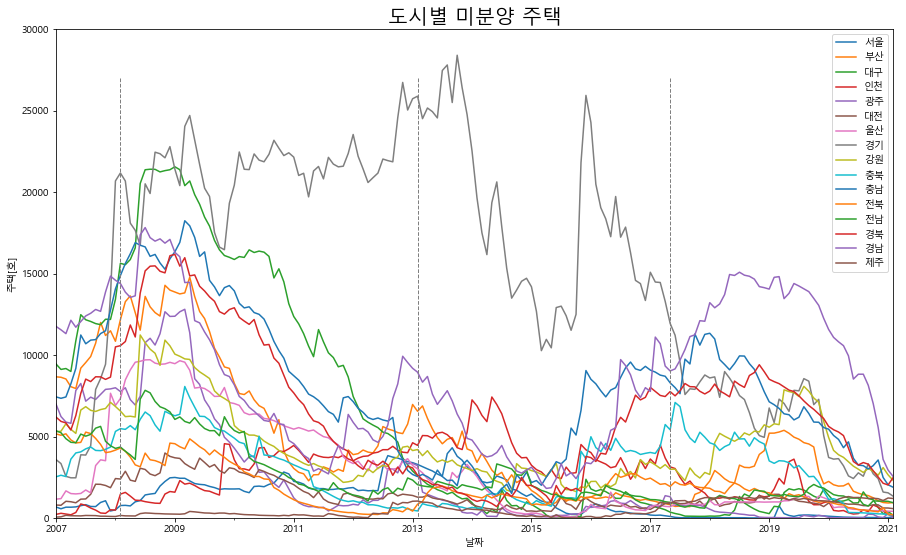

In [21]:
unsold1.plot()
plt.legend(loc = "upper right")  # 범례 오른쪽 위
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("도시별 미분양 주택", fontsize=20)
plt.ylim(0, 30000)
plt.ylabel("주택[호]")
plt.show() 

- 미분양 주택은 2008년부터 감소하다 2016년 반등 후 2018년쯤 부터 다시 감소한 것을 알 수 있다.

### - 주택 매매 가격과 미분양 주택 회귀 분석

In [22]:
# 전국, 수도권 미분양 주택만 행으로 선택
unsold2 = unsold[["전국", "수도권", "날짜"]]
unsold2.set_index('날짜', inplace=True) # 날짜 index로 선택

# 주택 매매 가격 총 지수와 통합
unsold_analysis = unsold2.join(house_price ["총지수"].iloc[12:182])
unsold_analysis.rename(columns = {"총지수": "주택 매매 가격 총지수"}, inplace = True) # column 이름 바꾸기
unsold_analysis

,전국,수도권,주택 매매 가격 총지수
날짜,,,
2007-01-01,75616,4544,75.802
2007-02-01,73619,4263,76.077
2007-03-01,73162,3532,76.217
2007-04-01,73393,3392,76.316
2007-05-01,78571,3554,76.342
...,...,...,...
2020-10-01,26703,3607,105.611
2020-11-01,23620,3183,107.125
2020-12-01,19005,2131,108.586


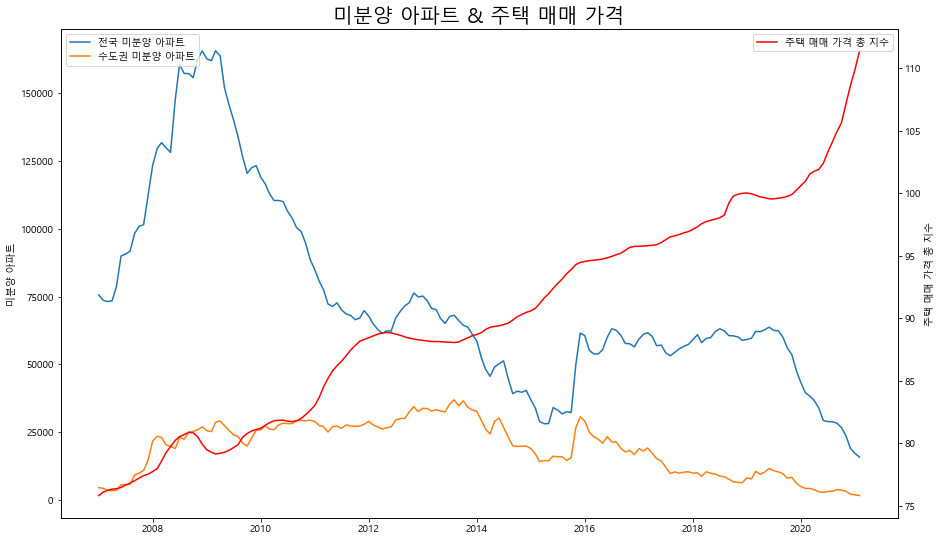

In [23]:
x = unsold["날짜"]
y1 = unsold["전국"]
y2 = unsold["수도권"]
y3 = unsold_analysis["주택 매매 가격 총지수"]

fig, ax1 = plt.subplots()
ax1.plot(x, y1, label='전국 미분양 아파트')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
ax1.plot(x, y2, label='수도권 미분양 아파트')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
plt.ylabel("미분양 아파트")
ax2 = ax1.twinx()
ax2.plot(x, y3, color='r', label='주택 매매 가격 총 지수')
ax2.legend(loc = "upper right")  # 범례 오른쪽 위
plt.title("미분양 아파트 & 주택 매매 가격", fontsize=20)
plt.xlabel("year")
plt.ylabel("주택 매매 가격 총 지수")
plt.show()

<AxesSubplot:>

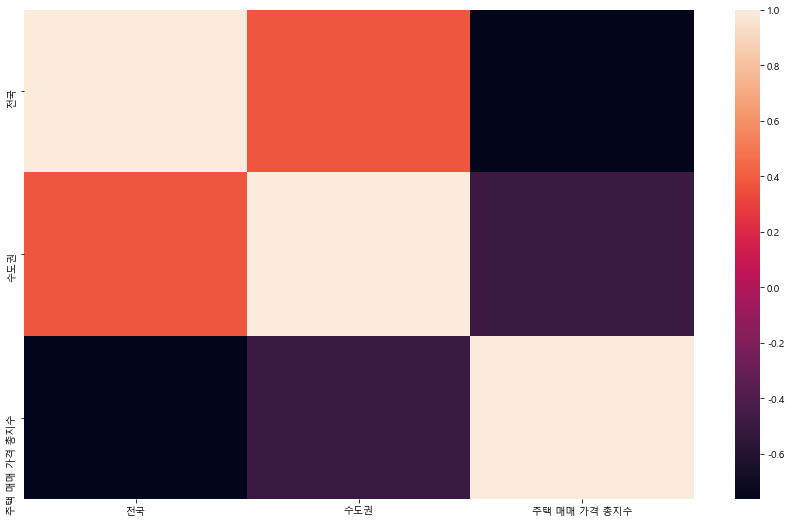

In [24]:
sns.heatmap(unsold_analysis.corr())

- heatmap에서는 주택 매매 가격 총 지수와 미분양 주택은 상관 관계가 아예 없다고 나오지만 이는 미분양 주택이 감소할 수록 주택 매매 가격은 증가한다는 것을 알 수 있다.

## 3rd Step [ 경제 시장 확인 ]
### - 소비자 물가 지수 그래프

In [25]:
consumer = pd.read_csv('소비자물가지수_한국(2015=100).csv', encoding='CP949', header=0, engine='python')
consumer["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/04/01', freq='MS'))
consumer = consumer.drop(["Day"], axis = 1)  # Day 열 제거
consumer

,물가 총지수,식료품 및 비주류 음료,주류 및 담배,주택 임차료,가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스,날짜
0,79.306,70.450,62.611,79.137,78.680,88.031,86.824,110.053,95.933,76.187,78.522,72.176,2006-01-01
1,79.464,70.170,62.548,79.216,78.680,88.117,87.076,110.053,95.739,76.792,78.601,72.317,2006-02-01
2,79.934,70.240,62.548,79.216,78.680,88.117,87.160,110.053,95.642,79.513,78.989,73.025,2006-03-01
3,80.013,70.030,62.548,79.295,78.759,88.117,87.833,110.053,95.545,79.664,78.989,74.016,2006-04-01
4,80.169,69.401,62.485,79.374,78.997,88.117,88.590,110.053,95.351,79.739,79.067,75.290,2006-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,105.670,115.790,103.380,104.670,107.450,103.820,99.710,95.800,100.000,100.910,111.670,111.130,2020-12-01
180,106.470,118.040,103.580,104.770,108.530,104.830,102.010,94.880,101.040,101.100,111.960,112.260,2021-01-01
181,107.000,120.970,103.540,104.960,107.940,104.810,102.700,94.890,99.880,101.260,112.260,112.140,2021-02-01
182,107.160,120.610,103.430,105.160,107.190,104.910,104.040,94.950,99.800,101.450,112.420,112.370,2021-03-01


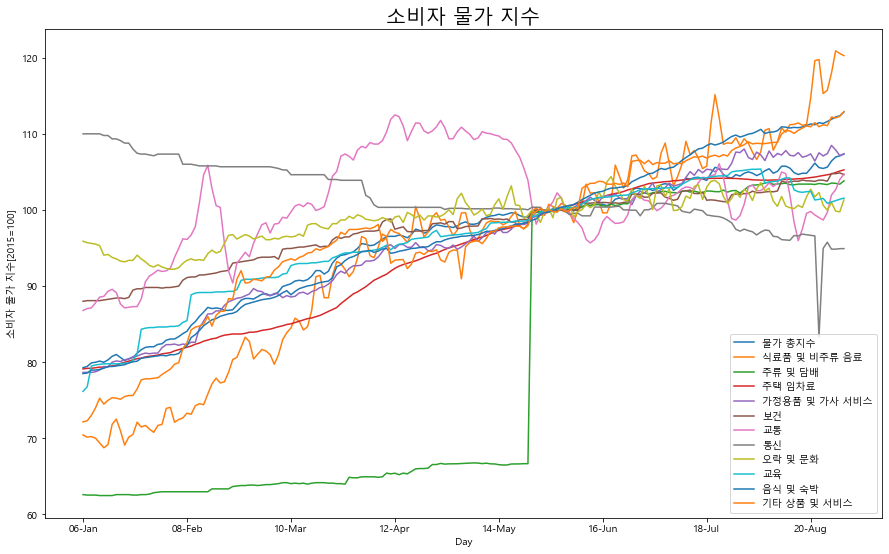

In [26]:
consumer1 = pd.read_csv('소비자물가지수_한국(2015=100).csv', encoding='CP949', index_col = "Day", header=0, engine='python')
consumer1.plot()
plt.title("소비자 물가 지수", fontsize=20)
plt.ylabel("소비자 물가 지수[2015=100]")
plt.show()

### - 주택 매매 가격 총 지수와 소비자 물가 지수 회귀 분석

In [27]:
consumer.set_index('날짜', inplace=True) # 날짜 index로 선택

# 주택 매매 가격 총 지수와 통합
consumer_analysis = consumer.join(house_price ["총지수"])
consumer_analysis.rename(columns = {"총지수": "주택 매매 가격 총지수"}, inplace = True) # column 이름 바꾸기
consumer_analysis

,물가 총지수,식료품 및 비주류 음료,주류 및 담배,주택 임차료,가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스,주택 매매 가격 총지수
날짜,,,,,,,,,,,,,
2006-01-01,79.306,70.450,62.611,79.137,78.680,88.031,86.824,110.053,95.933,76.187,78.522,72.176,67.559
2006-02-01,79.464,70.170,62.548,79.216,78.680,88.117,87.076,110.053,95.739,76.792,78.601,72.317,67.865
2006-03-01,79.934,70.240,62.548,79.216,78.680,88.117,87.160,110.053,95.642,79.513,78.989,73.025,68.300
2006-04-01,80.013,70.030,62.548,79.295,78.759,88.117,87.833,110.053,95.545,79.664,78.989,74.016,68.904
2006-05-01,80.169,69.401,62.485,79.374,78.997,88.117,88.590,110.053,95.351,79.739,79.067,75.290,69.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,105.670,115.790,103.380,104.670,107.450,103.820,99.710,95.800,100.000,100.910,111.670,111.130,108.586
2021-01-01,106.470,118.040,103.580,104.770,108.530,104.830,102.010,94.880,101.040,101.100,111.960,112.260,109.878
2021-02-01,107.000,120.970,103.540,104.960,107.940,104.810,102.700,94.890,99.880,101.260,112.260,112.140,111.375


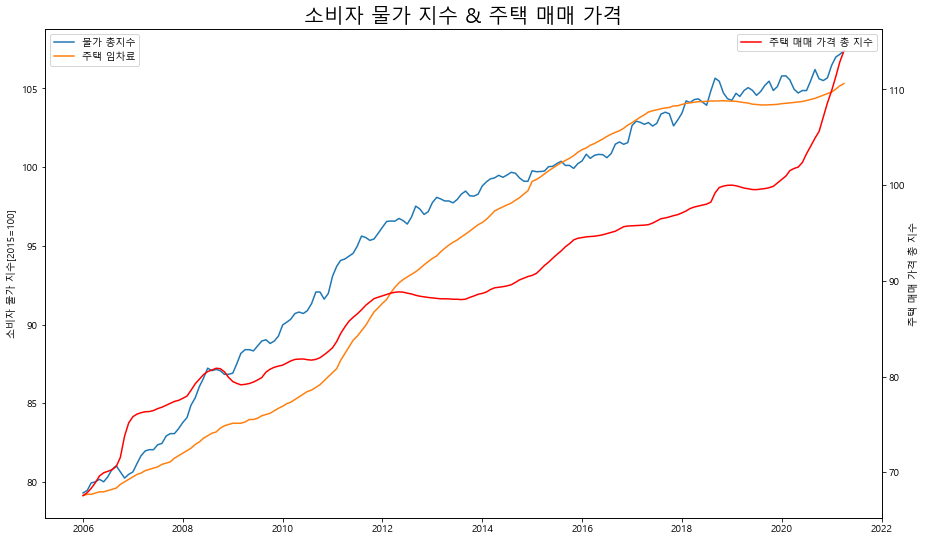

In [28]:
x = Day3["날짜_2104"]
y1 = consumer_analysis["물가 총지수"]
y2 = consumer_analysis["주택 임차료"]
y3 = consumer_analysis["주택 매매 가격 총지수"]

fig, ax1 = plt.subplots()
ax1.plot(x, y1, label='물가 총지수')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
ax1.plot(x, y2, label='주택 임차료')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
plt.ylabel("소비자 물가 지수[2015=100]")
ax2 = ax1.twinx()
ax2.plot(x, y3, color='r', label='주택 매매 가격 총 지수')
ax2.legend(loc = "upper right")  # 범례 오른쪽 위
plt.title("소비자 물가 지수 & 주택 매매 가격", fontsize=20)
plt.xlabel("year")
plt.ylabel("주택 매매 가격 총 지수")
plt.show()

<AxesSubplot:>

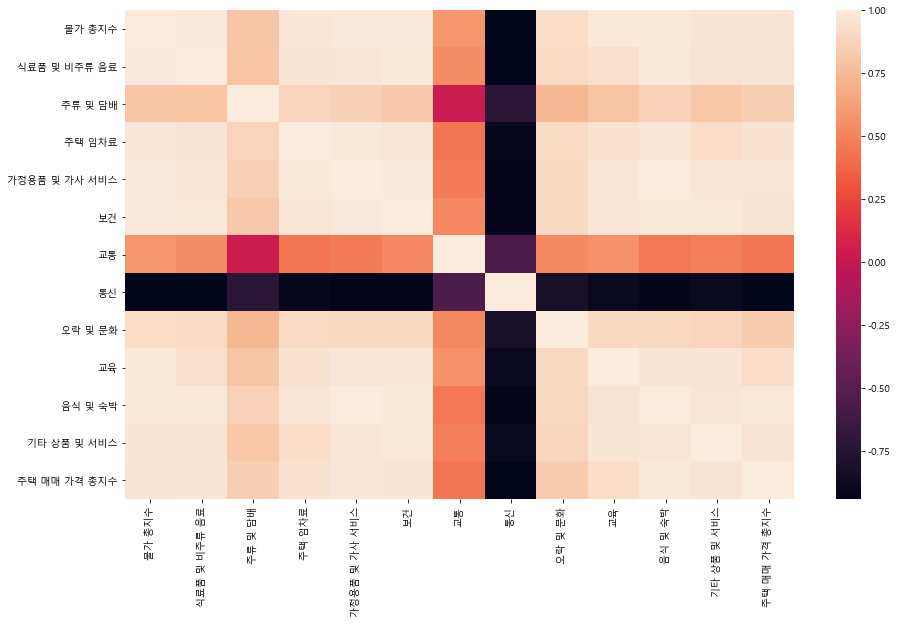

In [29]:
sns.heatmap(consumer_analysis.corr())

- 교통과 통신을 제외한 소비자 물가지수와 주택 매매 가격 지수는 상관관계가 매우 높은 것을 알 수 있다.

### - 채권 그래프

In [30]:
bond = pd.read_csv('채권(십억원).csv', encoding='CP949', header=0, engine='python')
bond["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/02/01', freq='MS'))
bond = bond.drop(["Day"], axis = 1)  # Day 열 제거
bond

,국민주택채권,산업금융채권,통화안정증권,서울지하철공채,날짜
0,547.9,1126.6,13340.0,57.6,2006-01-01
1,625.1,1803.8,14968.7,51.0,2006-02-01
2,746.4,1955.2,12050.0,46.8,2006-03-01
3,754.2,2021.5,8260.0,40.8,2006-04-01
4,875.7,2893.7,12730.0,41.1,2006-05-01
...,...,...,...,...,...
177,1539.1,3032.6,10810.0,65.3,2020-10-01
178,1534.5,4688.5,10610.0,72.1,2020-11-01
179,1923.9,2746.6,10130.0,91.9,2020-12-01
180,1406.3,5274.1,11450.0,65.5,2021-01-01


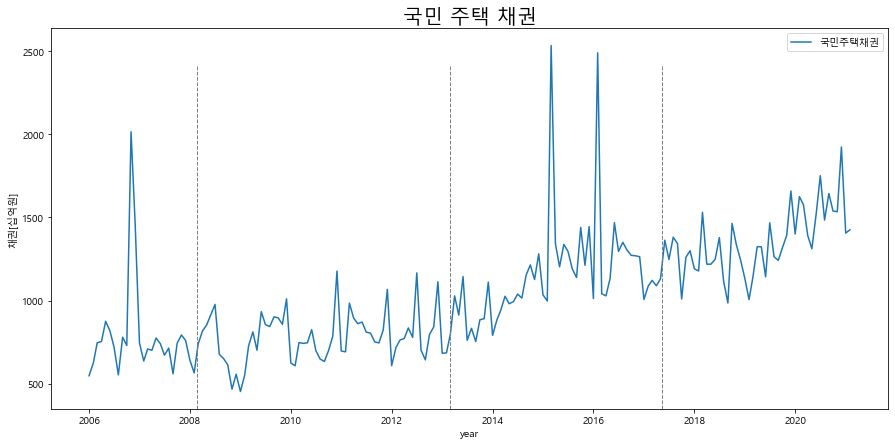

In [31]:
x = bond["날짜"]
y = bond["국민주택채권"]

plt.figure(figsize=(15,7))
plt.plot(x, y, label='국민주택채권')
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("국민 주택 채권", fontsize=20)
plt.legend()
plt.xlabel("year")
plt.ylabel("채권[십억원]")
plt.show()

### - 주택 매매 가격 총 지수와 채권 회귀 분석

In [32]:
bond.set_index('날짜', inplace=True) # "날짜를 인덱스로"

# 주택 매매 가격 총 지수와 통합
bond_analysis = bond.join(house_price ["총지수"].iloc[0:182])
bond_analysis.rename(columns = {"총지수": "주택 매매 가격 총지수"}, inplace = True) # column 이름 바꾸기
bond_analysis

,국민주택채권,산업금융채권,통화안정증권,서울지하철공채,주택 매매 가격 총지수
날짜,,,,,
2006-01-01,547.9,1126.6,13340.0,57.6,67.559
2006-02-01,625.1,1803.8,14968.7,51.0,67.865
2006-03-01,746.4,1955.2,12050.0,46.8,68.300
2006-04-01,754.2,2021.5,8260.0,40.8,68.904
2006-05-01,875.7,2893.7,12730.0,41.1,69.608
...,...,...,...,...,...
2020-10-01,1539.1,3032.6,10810.0,65.3,105.611
2020-11-01,1534.5,4688.5,10610.0,72.1,107.125
2020-12-01,1923.9,2746.6,10130.0,91.9,108.586


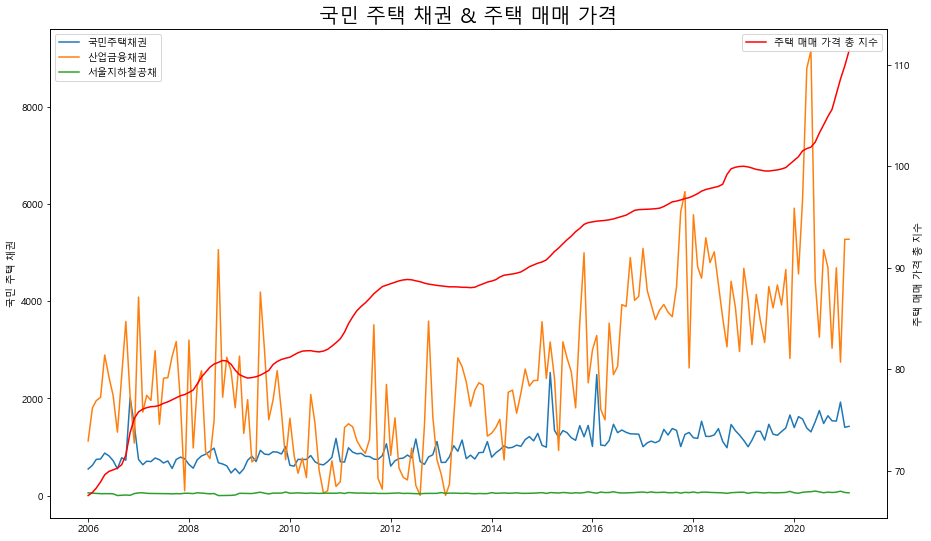

In [33]:
x = Day1["날짜_2102"]
y1 = bond_analysis["국민주택채권"]
y2 = bond_analysis["산업금융채권"]
y3 = bond_analysis["서울지하철공채"]
y4 = bond_analysis["주택 매매 가격 총지수"]

fig, ax1 = plt.subplots()
ax1.plot(x, y1, label='국민주택채권')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
ax1.plot(x, y2, label='산업금융채권')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
ax1.plot(x, y3, label='서울지하철공채')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
plt.ylabel("국민 주택 채권")
ax2 = ax1.twinx()
ax2.plot(x, y4, color='r', label='주택 매매 가격 총 지수')
ax2.legend(loc = "upper right")  # 범례 오른쪽 위
plt.title("국민 주택 채권 & 주택 매매 가격", fontsize=20)
plt.xlabel("year")
plt.ylabel("주택 매매 가격 총 지수")
plt.show()

<AxesSubplot:>

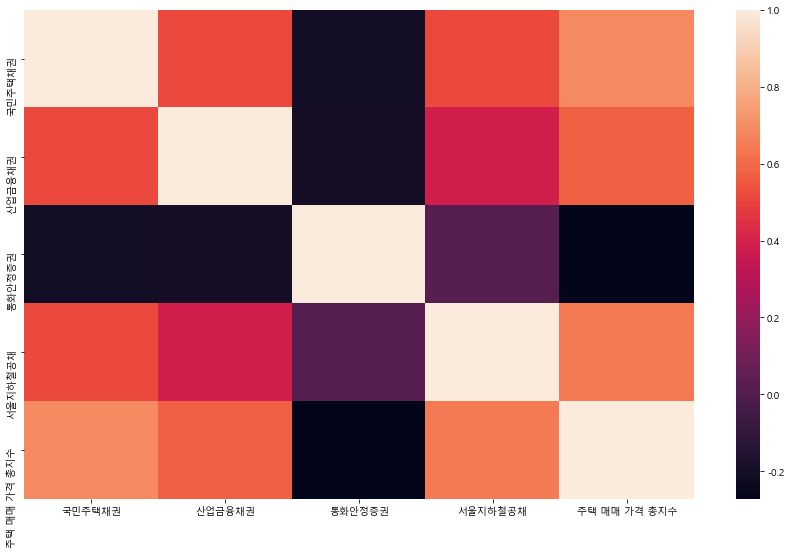

In [34]:
sns.heatmap(bond_analysis.corr())

- 주택 매매 가격 총지수와 국민 주택채권은 약간의 상관관계가 있다.

### - 중앙 은행 정책 금리 분석

In [35]:
interest_rate = pd.read_csv('중앙은행정책금리(%).csv', encoding='CP949', header=0, engine='python')
interest_rate["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/04/01', freq='MS'))
interest_rate = interest_rate.drop(["Day"], axis = 1)  # Day 열 제거
interest_rate

,한국,일본,미국,날짜
0,NaN,6.25,13.400,1980-01-01
1,NaN,7.25,16.330,1980-02-01
2,NaN,9.00,19.850,1980-03-01
3,NaN,9.00,14.640,1980-04-01
4,NaN,9.00,11.060,1980-05-01
...,...,...,...,...
490,0.5,-0.10,0.125,2020-11-01
491,0.5,-0.10,0.125,2020-12-01
492,0.5,-0.10,0.125,2021-01-01
493,0.5,-0.10,0.125,2021-02-01


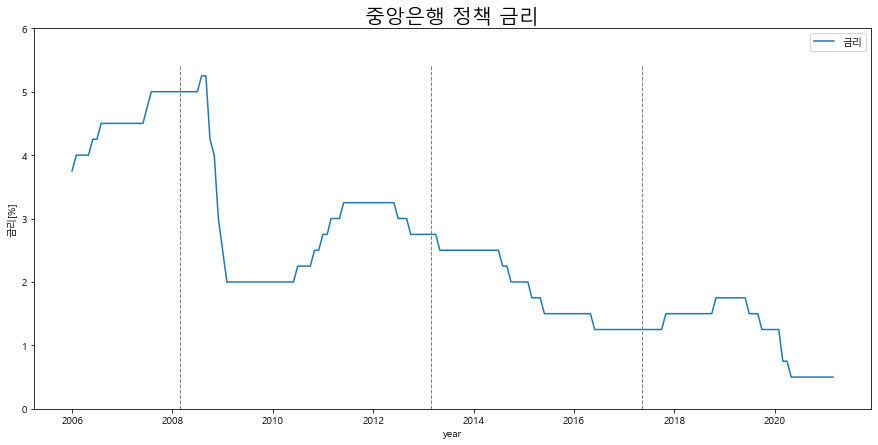

In [36]:
x = interest_rate["날짜"][312::]
y = interest_rate["한국"][312::]

plt.figure(figsize=(15,7))
plt.plot(x, y, label='금리')
plt.axvline(president[president['대통령']=='이명박'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='박근혜'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.axvline(president[president['대통령']=='문재인'].취임.item(), 0.9, 0, color='gray', linewidth=1, linestyle='--')
plt.title("중앙은행 정책 금리", fontsize=20)
plt.legend()
plt.ylim(0, 6)
plt.xlabel("year")
plt.ylabel("금리[%]")
plt.show()

### - 주식 시장 분석

In [37]:
K_stock = pd.read_csv('주식시장.csv', encoding='CP949', index_col = "Day", header=0, engine='python')
K_stock

,KOSPI지수,KOSDAQ지수
Day,,
2003-01-02,635.17,466.00
2003-01-03,661.10,483.40
2003-01-06,666.71,487.30
2003-01-07,652.20,476.80
2003-01-08,651.72,481.60
...,...,...
2021-05-10,3249.30,992.80
2021-05-11,3209.43,978.61
2021-05-12,3161.66,967.10


In [38]:
# 2006년 1월 첫번째 index 행 번호 추출
index_num = 0
for index in K_stock.index:
    compare_date = "2006-01-01"
    formatted_date1 = time.strptime(index, "%Y-%m-%d")
    formatted_date2 = time.strptime(compare_date, "%Y-%m-%d")
    if formatted_date1 >= formatted_date2:
        break
    index_num += 1
    
K_stock = K_stock.iloc[index_num::]
K_stock = K_stock.copy()  # SettingWithCopyWarning 문제 해결
K_stock

,KOSPI지수,KOSDAQ지수
Day,,
2006-01-02,1389.27,727.07
2006-01-03,1394.87,735.15
2006-01-04,1402.11,740.48
2006-01-05,1395.51,736.66
2006-01-06,1412.78,747.10
...,...,...
2021-05-10,3249.30,992.80
2021-05-11,3209.43,978.61
2021-05-12,3161.66,967.10


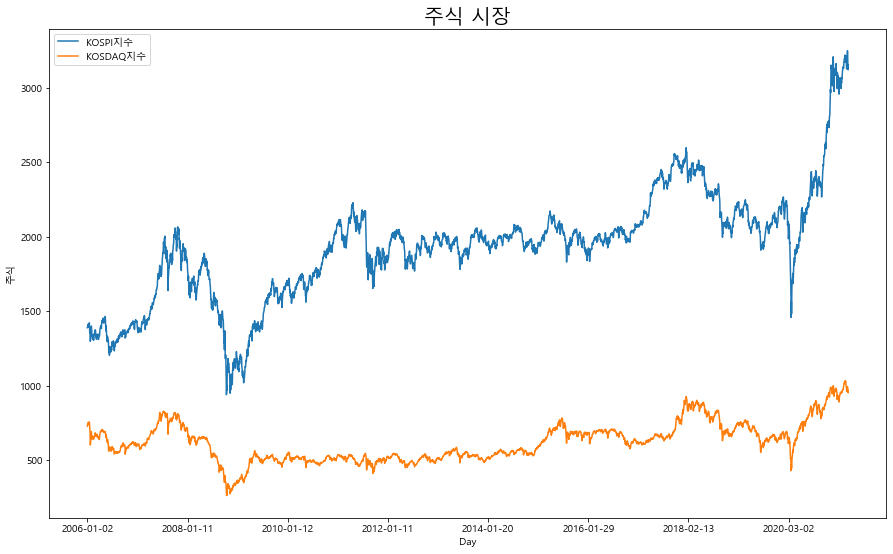

In [39]:
K_stock.dropna(inplace=True) # 결측치 제거
K_stock.plot()
plt.title("주식 시장", fontsize=20)
plt.ylabel("주식")
plt.show()

### - 금리와 주식 그래프 비교

In [40]:
stock = pd.read_csv('한일미_주가지수.csv', encoding='CP949', header=0, engine='python')
stock["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/04/01', freq='MS'))
stock = stock.drop(["Day"], axis = 1)  # Day 열 제거
stock

,한국(KOSPI),미국(NASDAQ),일본(NIKKEI),날짜
0,105.89,161.75,6768.16,1980-01-01
1,103.74,158.03,6764.89,1980-02-01
2,105.00,131.00,6556.19,1980-03-01
3,116.09,139.99,6865.56,1980-04-01
4,116.43,150.45,6855.70,1980-05-01
...,...,...,...,...
491,2873.47,12888.28,27444.17,2020-12-01
492,2976.21,13070.69,27663.39,2021-01-01
493,3012.95,13192.35,28966.01,2021-02-01
494,3061.42,13246.87,29178.80,2021-03-01


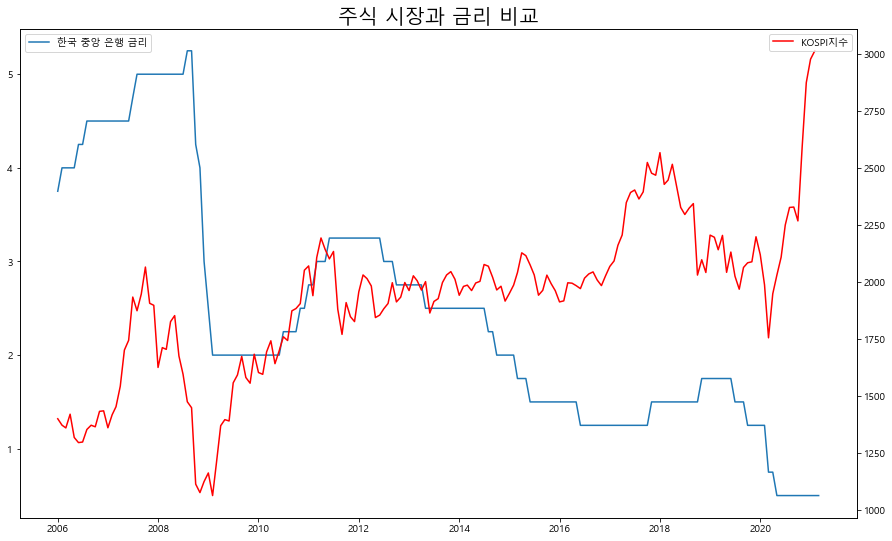

In [41]:
x = interest_rate["날짜"][312::]
x2 = stock["날짜"][312:494]
y1 = interest_rate["한국"][312::]
y2 = stock["한국(KOSPI)"][312:494]

fig, ax1 = plt.subplots()
ax1.plot(x, y1, label='한국 중앙 은행 금리')
ax1.legend(loc = "upper left")  # 범례 왼쪽 위
ax2 = ax1.twinx()
ax2.plot(x2, y2, color='r', label='KOSPI지수')
ax2.legend(loc = "upper right")  # 범례 왼쪽 위
plt.title("주식 시장과 금리 비교", fontsize=20)
plt.show()

- 금리가 낮아지면 주식 시장이 활발해지는 것을 알 수 있다.

### - 주택 매매 가격 총 지수와 금리, 주식 회귀 분석

In [42]:
# 한국 중앙 은행 금리 DataFrame
rate_analysis = interest_rate.loc[312::, ["한국", "날짜"]]
rate_analysis.rename(columns = {"한국": "한국 금리"}, inplace = True) # column 이름 바꾸기
rate_analysis.set_index('날짜', inplace=True) # 날짜 index로 선택

# 한국 코스피 DataFrame
stock_analysis = stock.loc[312:494, ["한국(KOSPI)", "날짜"]]
stock_analysis.set_index('날짜', inplace=True) # 날짜 index로 선택

# 한국 중앙 은행 금리와 코스피 통합
market_analysis = stock_analysis.join(rate_analysis)

# 주택 매매 가격 총 지수와 통합
market_analysis = market_analysis.join(house_price ["총지수"].iloc[:183])
market_analysis.rename(columns = {"총지수": "주택 매매 가격 총지수"}, inplace = True) # column 이름 바꾸기
market_analysis

,한국(KOSPI),한국 금리,주택 매매 가격 총지수
날짜,,,
2006-01-01,1399.83,3.75,67.559
2006-02-01,1371.59,4.00,67.865
2006-03-01,1359.60,4.00,68.300
2006-04-01,1419.73,4.00,68.904
2006-05-01,1317.70,4.00,69.608
...,...,...,...
2020-11-01,2591.34,0.50,107.125
2020-12-01,2873.47,0.50,108.586
2021-01-01,2976.21,0.50,109.878


<AxesSubplot:>

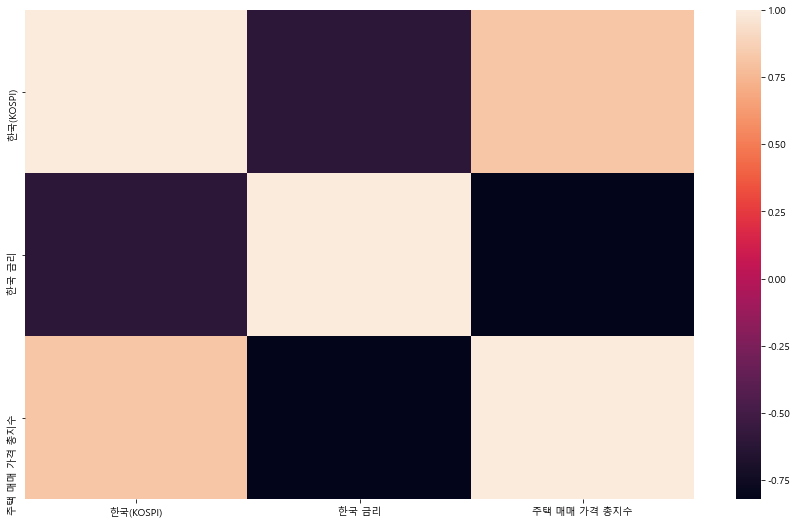

In [43]:
sns.heatmap(market_analysis.corr())

- 주택 매매 가격 지수와 주식 시장은 비례 관계이고 금리와는 반비례 관계이다.

## Final Step
### - 부동산 시장 소비 심리 지수

In [44]:
real_estate_market = pd.read_csv('부동산시장_소비심리지수.csv', index_col = "지 역", encoding='UTF8', header=0, engine='python')
real_estate_market["2011년 07월"]["전국"] = real_estate_market["2011년 07월"][1::].mean()
real_estate_market = real_estate_market.T
real_estate_market = real_estate_market[['전국', '수도권']] # 특정 열만 선택
real_estate_market

지 역,전국,수도권
2011년 07월,129.21875,119.5
2011년 08월,129.90000,124.8
2011년 09월,125.70000,120.9
2011년 10월,116.40000,108.9
2011년 11월,108.30000,100.0
...,...,...
2020년 11월,131.70000,131.3
2020년 12월,127.70000,130.5
2021년 01월,125.30000,128.9
2021년 02월,123.40000,127.2


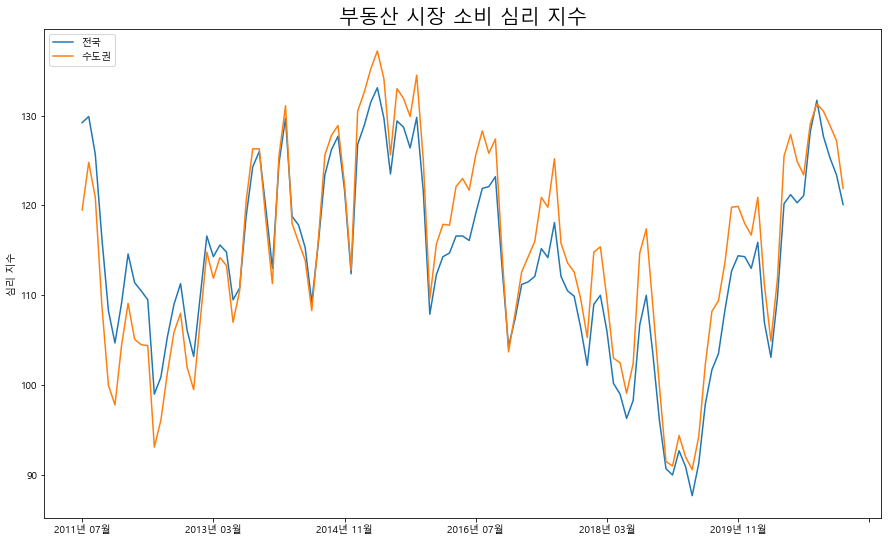

In [45]:
real_estate_market.plot()
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.title("부동산 시장 소비 심리 지수", fontsize=20)
plt.ylabel("심리 지수")
plt.show()

# 한국과 일본 비교
![한국과 일본](한국일본비교.png)
- 한국과 일본 구성도

## 1st Step - 1980년대 일본과 OECD국가 비교
### - 1인당 GDP

In [46]:
per_GDP = pd.read_csv('1인당GDP(달러).csv', encoding='CP949', header=0, engine='python')
per_GDP.head()

,Day,한국,호주,오스트리아,벨기에,캐나다,칠레,체코,덴마크,에스토니아,...,폴란드,포르투갈,슬로바키아,슬로베니아,스페인,스웨덴,스위스,터키,영국,미국
0,1980,1714.6,11699.2,10869.1,12897.3,NaN,11259.5,NaN,NaN,13881.1,...,NaN,3335.7,NaN,NaN,6127.5,17099.2,19210.0,2132.7,10029.4,12547.1
1,1981,1883.5,13522.8,9384.9,10642.1,NaN,12379.0,NaN,NaN,12080.8,...,NaN,3215.0,NaN,NaN,5306.9,15587.4,17473.0,2149.0,9594.4,13943.2
2,1982,1992.3,12636.1,9410.0,9350.5,NaN,12527.0,NaN,NaN,11803.9,...,NaN,3050.2,NaN,NaN,5101.2,13739.5,17803.8,1904.5,9149.0,14399.4
3,1983,2199.0,12487.7,9537.1,8847.5,NaN,13477.0,NaN,NaN,11858.6,...,NaN,2710.2,NaN,NaN,4428.1,12608.4,17699.6,1775.2,8693.8,15508.0
4,1984,2413.3,13235.7,8991.0,8457.4,NaN,13930.8,NaN,NaN,11564.3,...,NaN,2500.4,NaN,NaN,4439.9,13098.5,16840.2,1684.2,8181.0,17080.0


In [47]:
# 주요 나라 따로 dataframe 만듬

OECD_per_GDP = per_GDP.drop(["한국", "일본", "미국"], axis = 1)  # "한국", "일본", "미국" 열 제거
#OECD_per_GEP.set_index('Day', inplace=True) # Day를 index로
korea_per_GDP = per_GDP[["Day", "한국"]]
#korea_per_GDP.set_index('Day', inplace=True) # Day를 index로
USA_per_GDP = per_GDP[["Day", "미국"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로
japan_per_GDP = per_GDP[["Day", "일본"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로

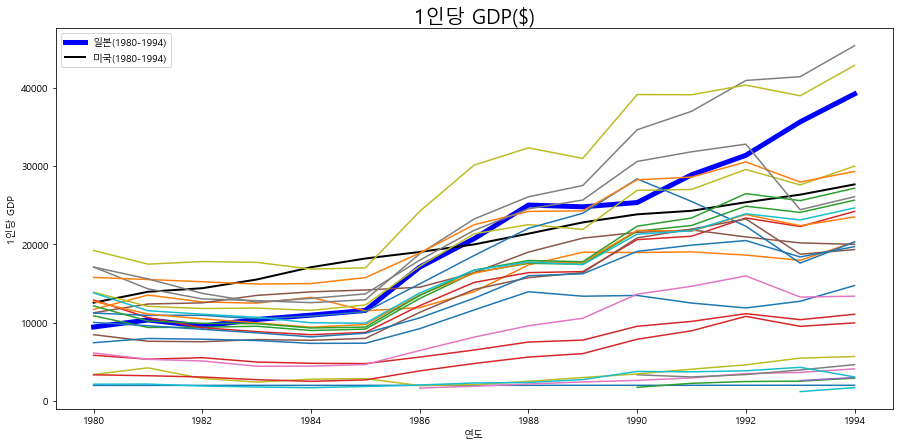

In [48]:
x = OECD_per_GDP["Day"][0:15]
y1 = japan_per_GDP["일본"][0:15]
y2 = USA_per_GDP["미국"][0:15]
y3 = OECD_per_GDP[0:15]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='b', label='일본(1980-1994)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(1980-1994)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("1인당 GDP($)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("1인당 GDP")
plt.show()

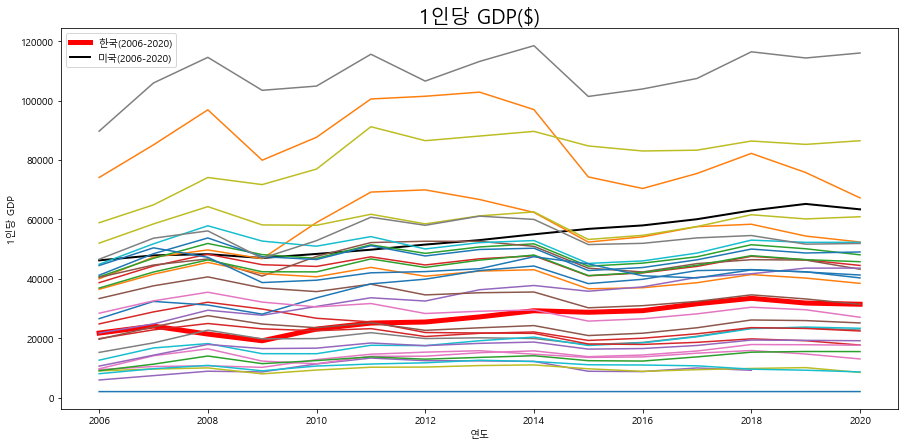

In [49]:
x = OECD_per_GDP["Day"][26::]
y1 = korea_per_GDP["한국"][26::]
y2 = USA_per_GDP["미국"][26::]
y3 = OECD_per_GDP[26::]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='r', label='한국(2006-2020)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(2006-2020)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("1인당 GDP($)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("1인당 GDP")
plt.show()

### - 국내 총 생산 GDP

In [50]:
total_GDP = pd.read_csv('국내총생산GDP(백만달러).csv', encoding='CP949', header=0, engine='python')
total_GDP.head()

,Day,한국,호주,오스트리아,벨기에,캐나다,칠레,체코,덴마크,에스토니아,...,폴란드,포르투갈,슬로바키아,슬로베니아,스페인,스웨덴,스위스,터키,영국,미국
0,1980,65367.8,173234.3,82055.3,126832.5,NaN,276034.5,NaN,NaN,71127.0,...,NaN,32895.4,NaN,NaN,232746.7,142092.9,122660.3,94770.8,564954.3,2857307.0
1,1981,72933.5,201805.4,71031.3,104728.9,NaN,307245.8,NaN,NaN,61878.1,...,NaN,31978.1,NaN,NaN,202820.5,129685.9,112336.8,97864.6,540720.8,3207042.0
2,1982,78349.5,191869.5,71272.8,92092.7,NaN,314638.9,NaN,NaN,60412.5,...,NaN,30526.9,NaN,NaN,196006.6,114380.4,115141.5,88916.6,515006.8,3343789.0
3,1983,87760.5,192229.8,72118.5,87182.8,NaN,341863.0,NaN,NaN,60644.8,...,NaN,27241.3,NaN,NaN,170945.0,105014.2,114728.5,84968.7,489599.8,3634038.0
4,1984,97511.3,206203.6,67984.6,83348.0,NaN,356727.9,NaN,NaN,59105.3,...,NaN,25218.2,NaN,NaN,172104.1,109201.4,109548.1,82641.8,461483.0,4037613.0


In [51]:
# 주요 나라 따로 dataframe 만듬

OECD_total_GDP = total_GDP.drop(["한국", "일본", "미국"], axis = 1)  # "한국", "일본", "미국" 열 제거
#OECD_per_GEP.set_index('Day', inplace=True) # Day를 index로
korea_total_GDP = total_GDP[["Day", "한국"]]
#korea_per_GDP.set_index('Day', inplace=True) # Day를 index로
USA_total_GDP = total_GDP[["Day", "미국"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로
japan_total_GDP = total_GDP[["Day", "일본"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로

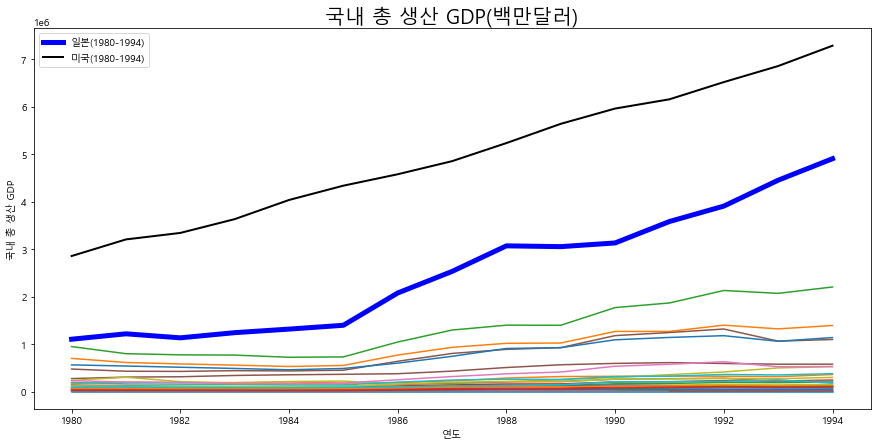

In [52]:
x = OECD_total_GDP["Day"][0:15]
y1 = japan_total_GDP["일본"][0:15]
y2 = USA_total_GDP["미국"][0:15]
y3 = OECD_total_GDP[0:15]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='b', label='일본(1980-1994)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(1980-1994)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국내 총 생산 GDP(백만달러)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국내 총 생산 GDP")
plt.show()

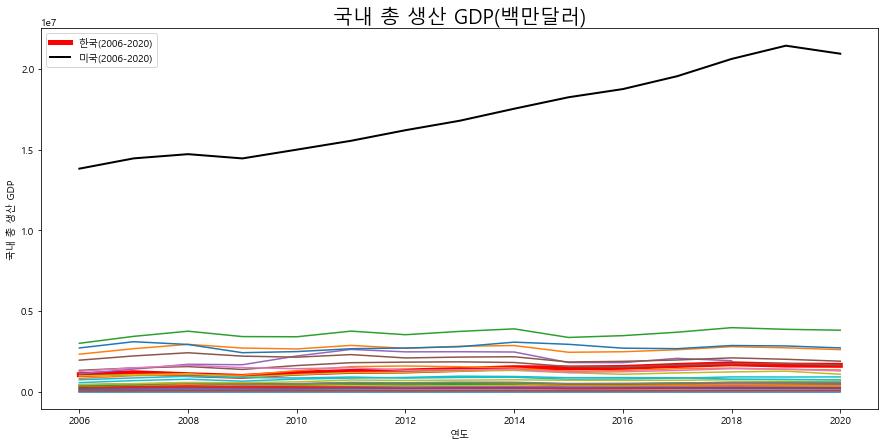

In [53]:
x = OECD_total_GDP["Day"][26::]
y1 = korea_total_GDP["한국"][26::]
y2 = USA_total_GDP["미국"][26::]
y3 = OECD_total_GDP[26::]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='r', label='한국(2006-2020)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(2006-2020)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국내 총 생산 GDP(백만달러)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국내 총 생산 GDP")
plt.show()

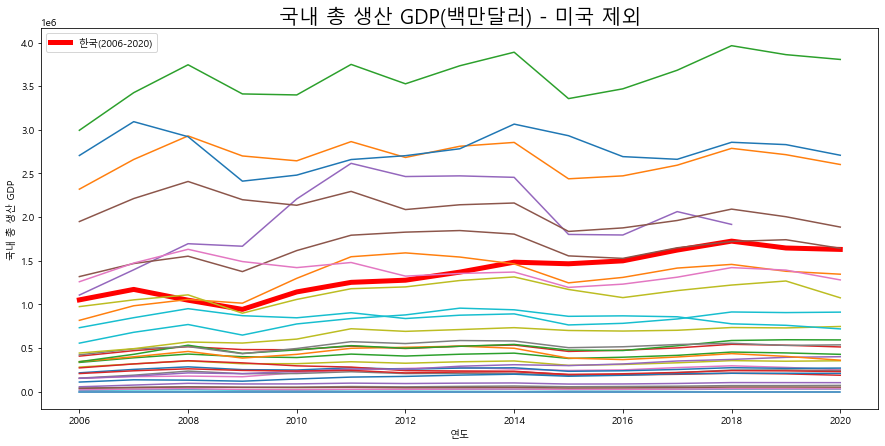

In [54]:
x = OECD_total_GDP["Day"][26::]
y1 = korea_total_GDP["한국"][26::]
y3 = OECD_total_GDP[26::]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='r', label='한국(2006-2020)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국내 총 생산 GDP(백만달러) - 미국 제외", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국내 총 생산 GDP")
plt.show()

### - 한국과 일본의 경제 규모(GDP)는 OECD 총 경제 규모의 몇 퍼센트인지 계산

In [55]:
total_GDP.set_index('Day', inplace=True) # Day를 index로

In [56]:
def percent(OECD_df, country, year):
    OECD_sum = 0
    OECD_df = OECD_df.loc[[year]].dropna(axis=1)  # 결측치 제거
    for gdp in OECD_df.columns:
        OECD_sum += total_GDP.loc[[year]][gdp]
    
    cpr_contry = OECD_df.loc[[year]][country]
    percent = cpr_contry / OECD_sum * 100
    return percent

In [57]:
japan1991 = percent(total_GDP, "일본", 1991)
japan1991

Day
1991    18.084565
dtype: float64

In [58]:
korea2020 = percent(total_GDP, "한국", 2020)
korea2020

Day
2020    3.530214
Name: 한국, dtype: float64

- 당시 일본의 경제 규모(GDP)는 약 18%로 OECD 총 경제 규모의 많은 부분을 차지했다.
  하지만 현재 한국의 경제 규모는 약 3.5%로 OECD 총 경제 규모의 큰 부분을 차지하고 있지는 않다.

### - 국민 총 소득 GNI

In [59]:
total_GNI = pd.read_csv('국민총소득GNI(백만달러).csv', encoding='CP949', header=0, engine='python')
total_GNI.head()

,Day,한국,호주,오스트리아,벨기에,캐나다,칠레,체코,덴마크,에스토니아,...,폴란드,포르투갈,슬로바키아,슬로베니아,스페인,스웨덴,스위스,터키,영국,미국
0,1980,64772.9,172620.5,82143.6,126901.2,267374.9,NaN,NaN,69963.6,NaN,...,NaN,32218.9,NaN,NaN,229735.4,140098.9,123550.9,NaN,599305.7,2847055.0
1,1981,71939.7,197925.9,70950.6,104869.8,296986.5,NaN,NaN,60076.8,NaN,...,NaN,30822.4,NaN,NaN,199137.6,127309.1,114188.7,NaN,570056.2,3201886.0
2,1982,77625.0,190373.3,71296.0,91781.7,303771.9,NaN,NaN,58229.3,NaN,...,NaN,28937.1,NaN,NaN,192304.3,111727.6,115984.7,NaN,541649.5,3371448.0
3,1983,86845.3,189887.5,72299.2,86843.9,331845.2,NaN,NaN,58620.6,NaN,...,NaN,25922.5,NaN,NaN,167316.7,102305.3,116067.6,NaN,517067.1,3614168.0
4,1984,96132.0,203297.2,68089.0,83202.5,345688.3,NaN,NaN,56865.1,NaN,...,NaN,23754.5,NaN,NaN,168554.1,106434.2,111556.2,NaN,487864.6,4032292.0


In [60]:
# 주요 나라 따로 dataframe 만듬

OECD_total_GNI = total_GNI.drop(["한국", "일본", "미국"], axis = 1)  # "한국", "일본", "미국" 열 제거
#OECD_per_GEP.set_index('Day', inplace=True) # Day를 index로
korea_total_GNI = total_GNI[["Day", "한국"]]
#korea_per_GDP.set_index('Day', inplace=True) # Day를 index로
USA_total_GNI = total_GNI[["Day", "미국"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로
japan_total_GNI = total_GNI[["Day", "일본"]]
#japan_per_GDP.set_index('Day', inplace=True) # Day를 index로

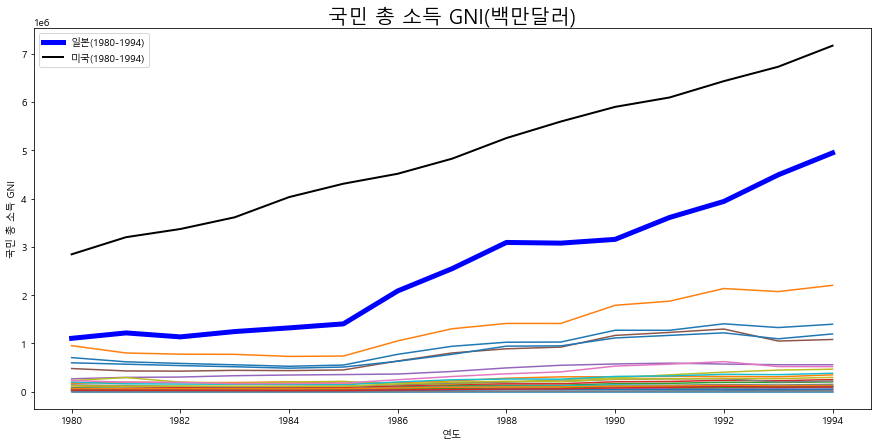

In [61]:
x = OECD_total_GNI["Day"][0:15]
y1 = japan_total_GNI["일본"][0:15]
y2 = USA_total_GNI["미국"][0:15]
y3 = OECD_total_GNI[0:15]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='b', label='일본(1980-1994)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(1980-1994)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국민 총 소득 GNI(백만달러)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국민 총 소득 GNI")
plt.show()

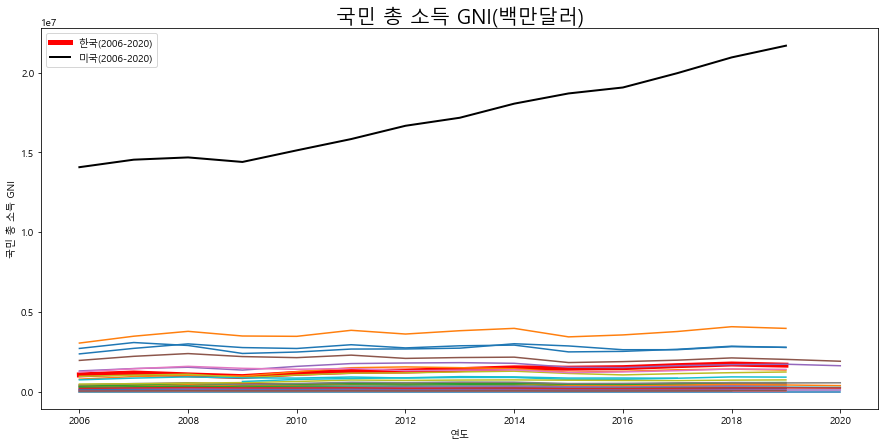

In [62]:
x = OECD_total_GNI["Day"][26::]
y1 = korea_total_GNI["한국"][26::]
y2 = USA_total_GNI["미국"][26::]
y3 = OECD_total_GNI[26::]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='r', label='한국(2006-2020)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y2, color='k', label='미국(2006-2020)', linewidth=2)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국민 총 소득 GNI(백만달러)", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국민 총 소득 GNI")
plt.show()

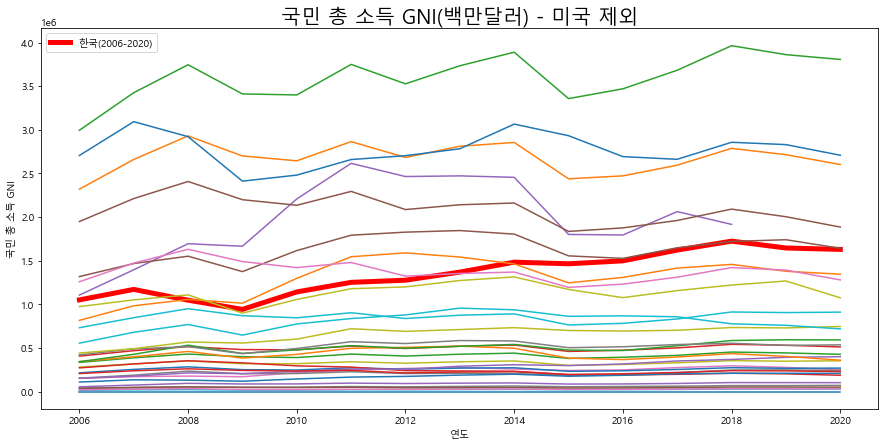

In [63]:
x = OECD_total_GDP["Day"][26::]
y1 = korea_total_GDP["한국"][26::]
y3 = OECD_total_GDP[26::]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y1, color='r', label='한국(2006-2020)', linewidth=5)
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x, y3)
plt.title("국민 총 소득 GNI(백만달러) - 미국 제외", fontsize=20)
plt.legend()
plt.xlabel("연도")
plt.ylabel("국민 총 소득 GNI")
plt.show()

## 2nd Step - 1980년대 일본과 2010년대 한국 비교
### - 경제 성장률 비교

In [64]:
economic_growth = pd.read_csv('경제성장률(%).csv', encoding='CP949', header=0, engine='python')
economic_growth

,Day,한국,일본
0,1980 1,0.9,0.4
1,1980 2,-0.5,-0.5
2,1980 3,1.9,2.2
3,1980 4,-2.8,2.1
4,1981 1,4.1,0.6
...,...,...,...
160,2020 1,-1.3,-0.6
161,2020 2,-3.2,-8.3
162,2020 3,2.1,5.3
163,2020 4,1.2,2.8


In [65]:
economic_growth.iloc[:61].tail()

,Day,한국,일본
56,1994 1,2.9,0.9
57,1994 2,1.6,-0.6
58,1994 3,1.7,1.2
59,1994 4,3.9,-0.4
60,1995 1,2.1,1.1


In [66]:
economic_growth.iloc[104::].head()

,Day,한국,일본
104,2006 1,1.6,0.1
105,2006 2,0.7,0.2
106,2006 3,1.6,-0.2
107,2006 4,0.8,1.3
108,2007 1,1.7,0.7


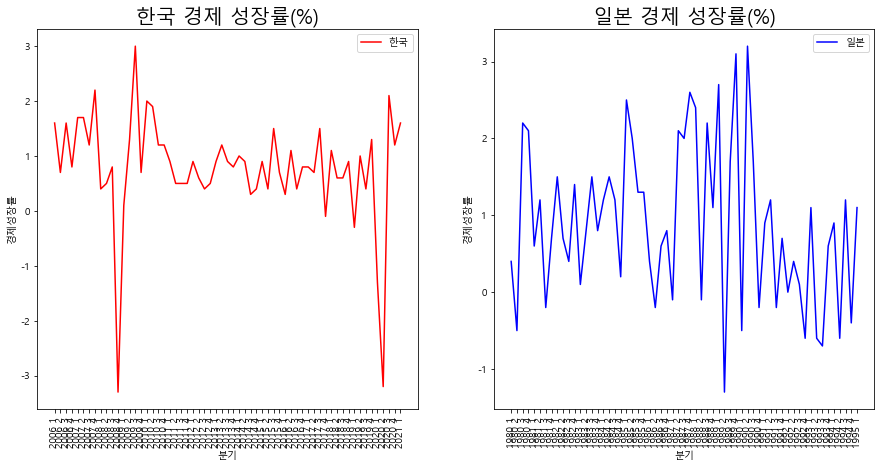

In [67]:
import matplotlib.ticker as ticker
x1 = economic_growth["Day"][104::]
x2 = economic_growth["Day"][:61]
y1 = economic_growth["한국"][104::]
y2 = economic_growth["일본"][:61]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(x1, y1, color='r', label='한국')
plt.title("한국 경제 성장률(%)", fontsize=20)
plt.legend()
plt.xlabel("분기")
plt.ylabel("경제성장률")
plt.xticks(rotation=90)
plt.subplot(122)
plt.plot(x2, y2, color='b', label='일본')
plt.title("일본 경제 성장률(%)", fontsize=20)
plt.legend()
plt.xlabel("분기")
plt.ylabel("경제성장률")
plt.xticks(rotation=90)
plt.show()

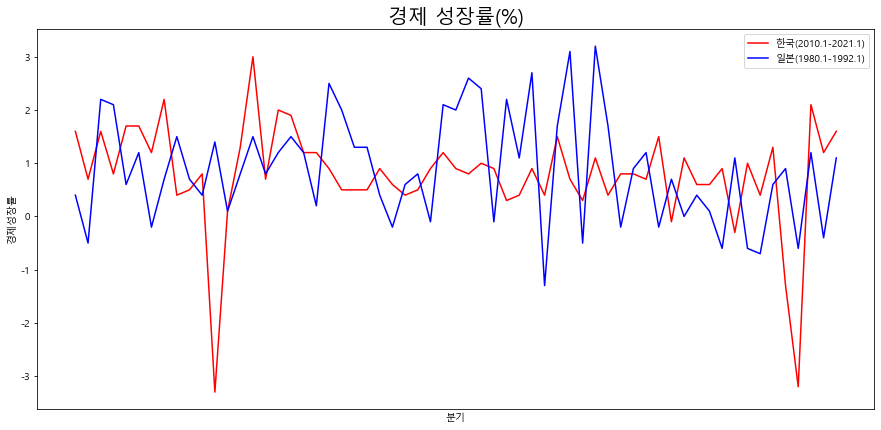

In [68]:
x1 = economic_growth["Day"][104::]
x2 = economic_growth["Day"][:61]
y1 = economic_growth["한국"][104::]
y2 = economic_growth["일본"][:61]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x1, y1, color='r', label='한국(2010.1-2021.1)')
plt.figure(1) # 1번 그래프 창을 생성함 
plt.plot(x1, y2, color='b', label='일본(1980.1-1992.1)')
plt.title("경제 성장률(%)", fontsize=20)
plt.legend()
plt.xlabel("분기")
plt.ylabel("경제성장률")
plt.tick_params( # xticks 제거
    axis='x',     
    which='both',   
    bottom=False,  
    top=False,   
    labelbottom=False)
plt.show()

- 일본은 1990년 2분기 경제 성장률 3.2%이후 1.2%를 넘기지 못한 것을 알 수 있다.

### - 물가 지수 비교

In [69]:
consumer_price = pd.read_csv('소비자물가지수(2010=100).csv', encoding='CP949', header=0, engine='python')
consumer_price["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
consumer_price = consumer_price.drop(["Day"], axis = 1)  # Day 열 제거
consumer_price.set_index('날짜', inplace=True) # 날짜를 index로
consumer_price

,한국,일본
날짜,,
1980-01-01,21.27,74.18
1980-02-01,22.19,74.80
1980-03-01,23.01,75.21
1980-04-01,23.18,76.56
1980-05-01,23.91,77.18
...,...,...
2020-11-01,115.87,104.95
2020-12-01,116.06,104.74
2021-01-01,116.93,105.26


In [70]:
producer_price = pd.read_csv('생산자물가지수(2010=100).csv', encoding='CP949', header=0, engine='python')
producer_price["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
producer_price = producer_price.drop(["Day"], axis = 1)  # Day 열 제거
producer_price.set_index('날짜', inplace=True) # 날짜를 index로
producer_price

,한국,일본
날짜,,
1980-01-01,34.14,106.44
1980-02-01,38.85,108.39
1980-03-01,40.29,110.05
1980-04-01,40.82,113.47
1980-05-01,41.57,114.44
...,...,...
2020-08-01,106.43,NaN
2020-09-01,106.64,NaN
2020-10-01,106.21,NaN


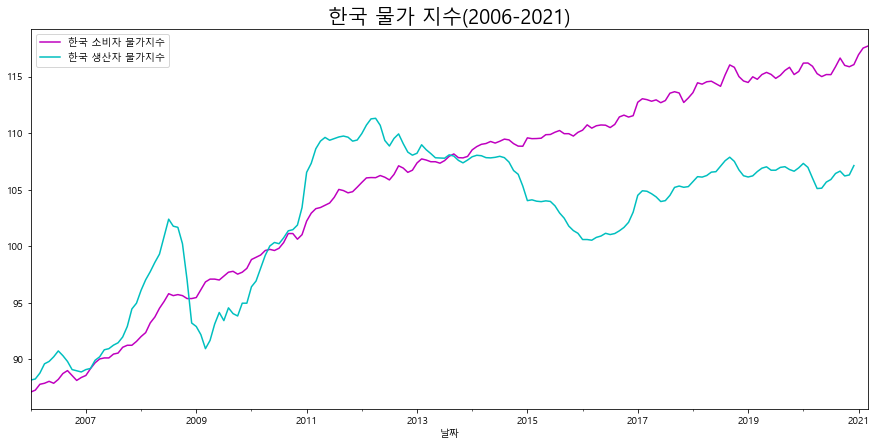

In [71]:
plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
consumer_price["한국"][312::].plot(color='m', label='한국 소비자 물가지수')
plt.legend()
plt.figure(1) # 1번 그래프 창을 생성함 
producer_price["한국"][312::].plot(color='c', label='한국 생산자 물가지수')
plt.legend()
plt.title("한국 물가 지수(2006-2021)", fontsize=20)
plt.show()

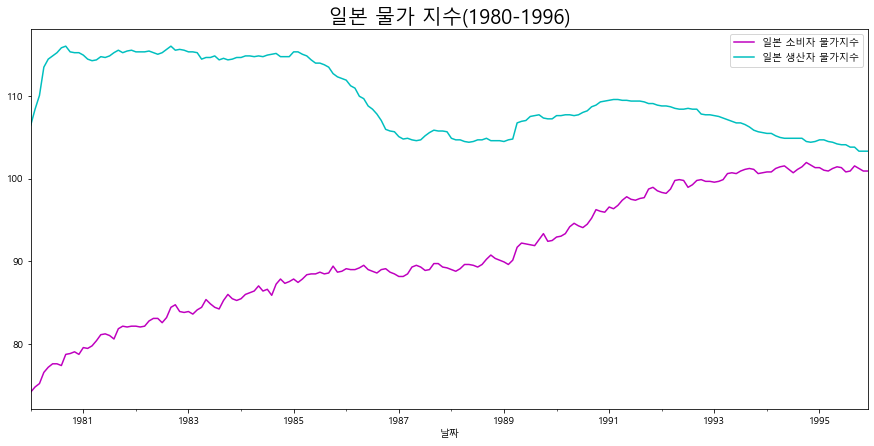

In [72]:
plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
consumer_price["일본"][:192].plot(color='m', label='일본 소비자 물가지수')
plt.legend()
plt.figure(1) # 1번 그래프 창을 생성함 
producer_price["일본"][:192].plot(color='c', label='일본 생산자 물가지수')
plt.legend()
plt.title("일본 물가 지수(1980-1996)", fontsize=20)
plt.show()

### - 중앙 은행 금리 비교

In [73]:
interest_rate.set_index('날짜', inplace=True) # 날짜를 index로
interest_rate

,한국,일본,미국
날짜,,,
1980-01-01,NaN,6.25,13.400
1980-02-01,NaN,7.25,16.330
1980-03-01,NaN,9.00,19.850
1980-04-01,NaN,9.00,14.640
1980-05-01,NaN,9.00,11.060
...,...,...,...
2020-11-01,0.5,-0.10,0.125
2020-12-01,0.5,-0.10,0.125
2021-01-01,0.5,-0.10,0.125


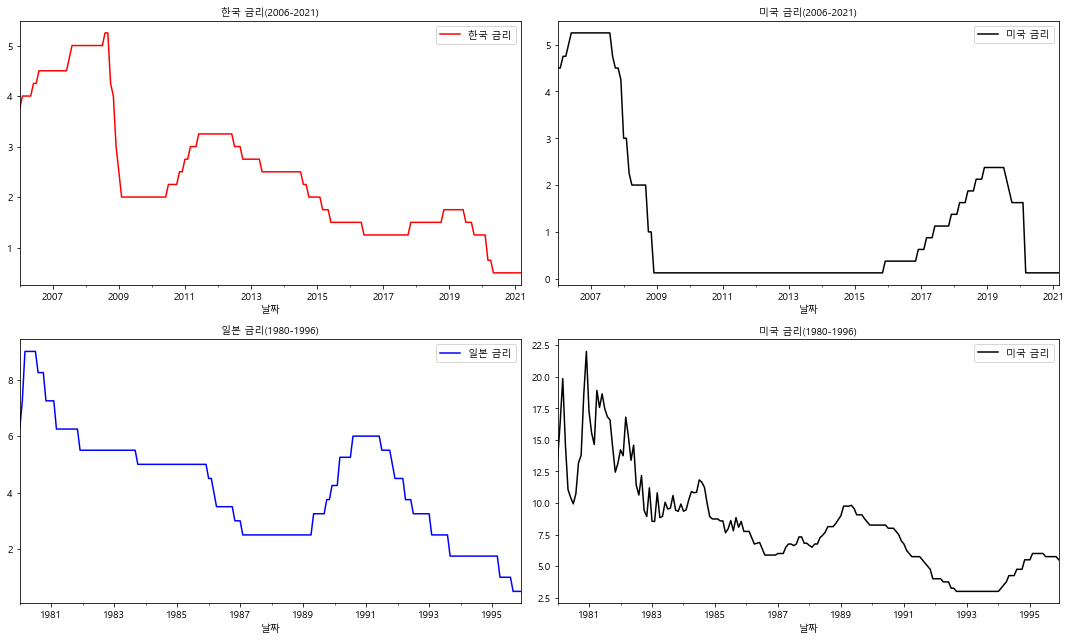

In [74]:
plt.subplot(221)
interest_rate["한국"][312::].plot(color='r', label='한국 금리')
plt.legend()
plt.title("한국 금리(2006-2021)", fontsize=10)
plt.subplot(222)
interest_rate["미국"][312::].plot(color='k', label='미국 금리')
plt.legend()
plt.title("미국 금리(2006-2021)", fontsize=10)
plt.subplot(223)
interest_rate["일본"][:192].plot(color='b', label='일본 금리')
plt.legend()
plt.title("일본 금리(1980-1996)", fontsize=10)
plt.subplot(224)
interest_rate["미국"][:192].plot(color='k', label='미국 금리')
plt.legend()
plt.title("미국 금리(1980-1996)", fontsize=10)
plt.tight_layout()  # 그래프 제목 잘 보이게 해주기 위해
plt.show()

### - 주가 지수 비교

Text(0.5, 1.0, '주가 지수')

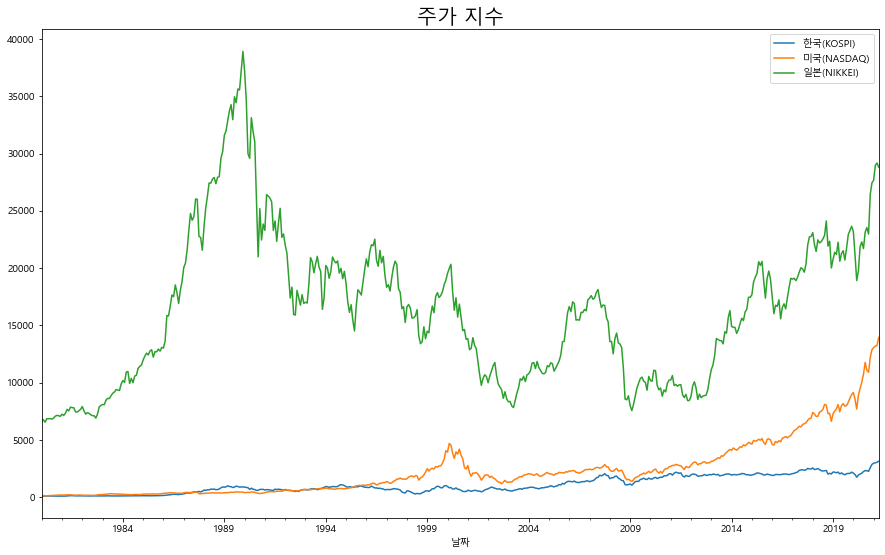

In [75]:
#stock = pd.read_csv('한일미_주가지수.csv', encoding='CP949', header=0, engine='python')
#stock["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/04/01', freq='MS'))
#stock = stock.drop(["Day"], axis = 1)  # Day 열 제거
stock.set_index('날짜', inplace=True) # 날짜를 index로
stock.plot()
plt.title("주가 지수", fontsize=20)

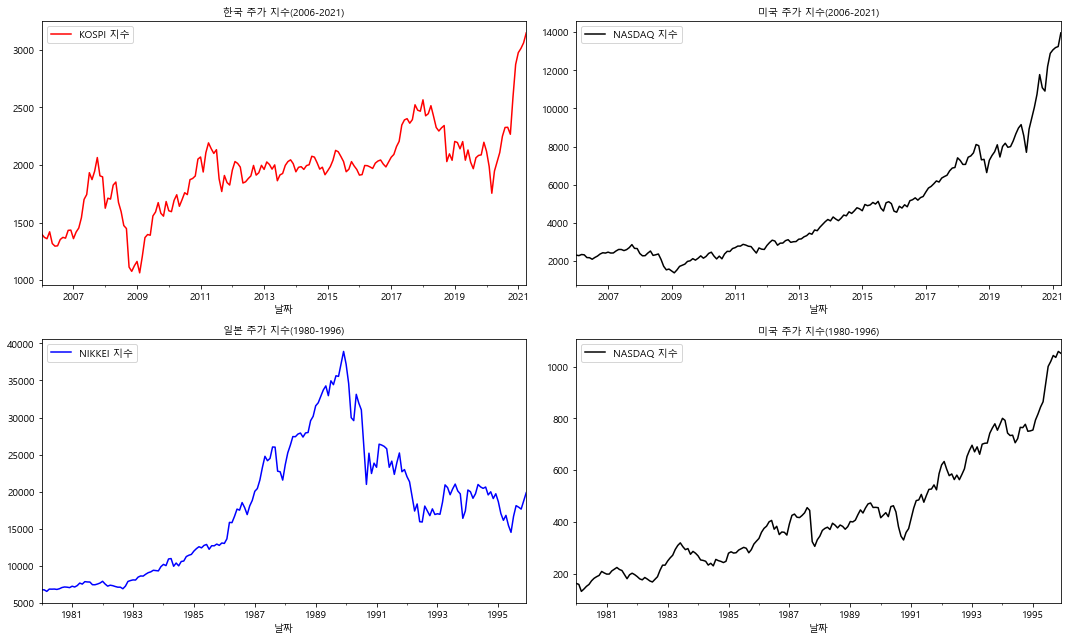

In [76]:
plt.subplot(221)
stock["한국(KOSPI)"][312::].plot(color='r', label='KOSPI 지수')
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.title("한국 주가 지수(2006-2021)", fontsize=10)
plt.subplot(222)
stock["미국(NASDAQ)"][312::].plot(color='k', label='NASDAQ 지수')
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.title("미국 주가 지수(2006-2021)", fontsize=10)
plt.subplot(223)
stock["일본(NIKKEI)"][:192].plot(color='b', label='NIKKEI 지수')
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.title("일본 주가 지수(1980-1996)", fontsize=10)
plt.subplot(224)
stock["미국(NASDAQ)"][:192].plot(color='k', label='NASDAQ 지수')
plt.legend(loc = "upper left")  # 범례 왼쪽 위
plt.title("미국 주가 지수(1980-1996)", fontsize=10)
plt.tight_layout()  # 그래프 제목 잘 보이게 해주기 위해
plt.show()

- 코스피는 나스닥과 비슷한 그래프를 보이지만 닛케이는 그렇지 않다.

### -  한국과 일본 부동산 그래프 비교
#### 일본 부동산 출처 : 국가 출처, BIS 주거용 부동산 가격 데이터베이스, http://www.bis.org/statistics/pp.htm.

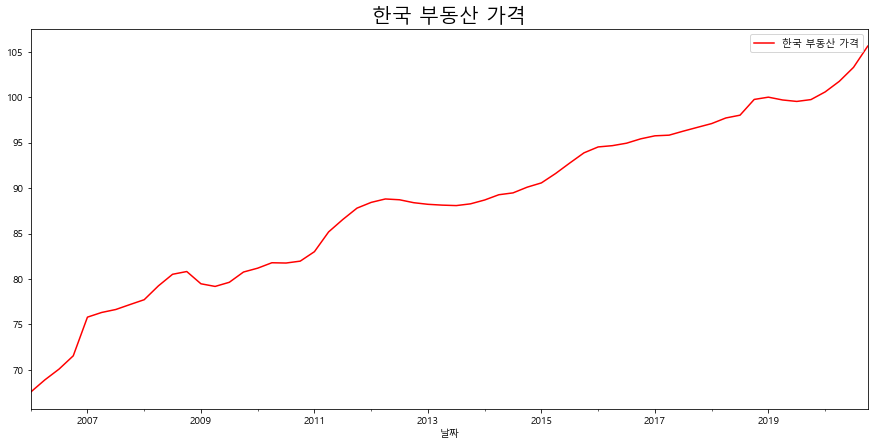

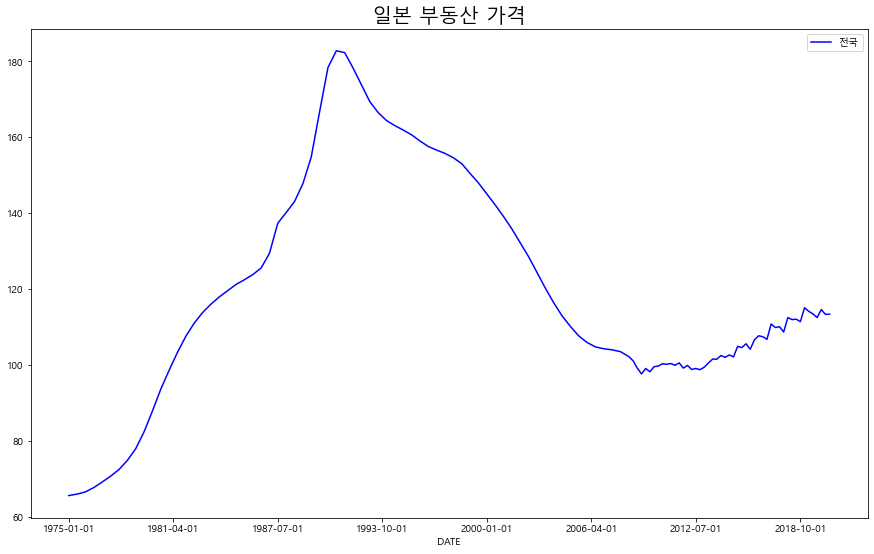

In [77]:
japan_house_price = pd.read_csv('일본부동산가격.csv', encoding='CP949', index_col = "DATE", header=0, engine='python')

# x축을 같게 하기 위해 한국 부동산 지표에서 분기만 가져옴
korea_house_price = house_price["총지수"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]

plt.figure(figsize=(15,7))
plt.figure(1) # 1번 그래프 창을 생성함 
korea_house_price.plot(color='r', label='한국 부동산 가격')
plt.title("한국 부동산 가격", fontsize=20)
plt.legend()
plt.figure(1) # 1번 그래프 창을 생성함 
japan_house_price.plot(color='b', label='일본 부동산 가격')
plt.title("일본 부동산 가격", fontsize=20)
plt.legend()
plt.show()

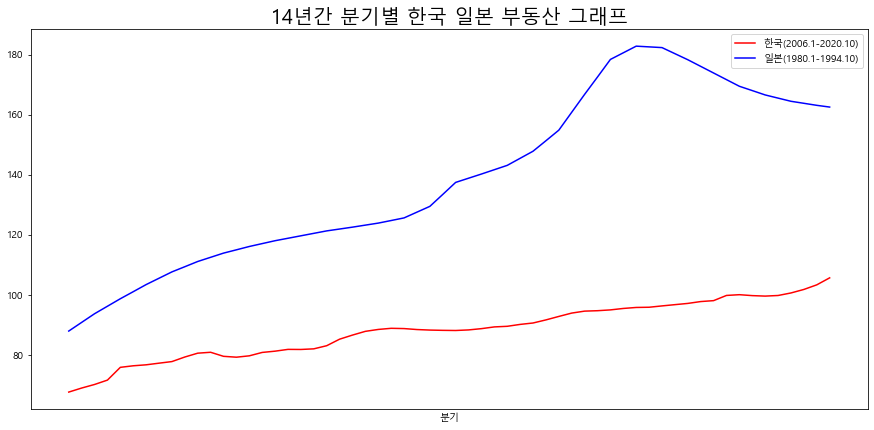

In [78]:
x = japan_house_price[20:80].index
y1 = korea_house_price
y2 = japan_house_price[20:80]

plt.figure(figsize=(15,7))
plt.plot(x, y1, color='r', label='한국(2006.1-2020.10)')
plt.legend()
plt.plot(x, y2, color='b', label='일본(1980.1-1994.10)')
plt.legend()
plt.tick_params( # xticks 제거
    axis='x',     
    which='both',   
    bottom=False,  
    top=False,   
    labelbottom=False)
plt.title("14년간 분기별 한국 일본 부동산 그래프", fontsize=20)
plt.xlabel("분기")
plt.show()

- 한국 부동산도 많이 올랐지만 일본의 버블경제 때보다는 비교적 덜 상승했다. 일본 부동산은 1991년을 기점으로 하락했다는 것을 알 수 있다.

## Final Step [ 부동산 예측 ] 

In [115]:
# data
economic_growth = pd.read_csv('경제성장률(%).csv', encoding='CP949', header=0, engine='python')
consumer_price = pd.read_csv('소비자물가지수(2010=100).csv', encoding='CP949', header=0, engine='python')
producer_price = pd.read_csv('생산자물가지수(2010=100).csv', encoding='CP949', header=0, engine='python')
interest_rate = pd.read_csv('중앙은행정책금리(%).csv', encoding='CP949', header=0, engine='python')
stock = pd.read_csv('한일미_주가지수.csv', encoding='CP949', header=0, engine='python')
japan_house_price = pd.read_csv('일본부동산가격.csv', encoding='CP949', header=0, engine='python')
house_price = pd.read_csv('주택매매가격지수(2019.01=100).csv', encoding='CP949', header=0, engine='python')

In [116]:
consumer_price["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
consumer_price = consumer_price.drop(["Day"], axis = 1)  # Day 열 제거
consumer_price.set_index('날짜', inplace=True) # 날짜를 index로

producer_price["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
producer_price = producer_price.drop(["Day"], axis = 1)  # Day 열 제거
producer_price.set_index('날짜', inplace=True) # 날짜를 index로

interest_rate["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
interest_rate = interest_rate.drop(["Day"], axis = 1)  # Day 열 제거
interest_rate.set_index('날짜', inplace=True) # 날짜를 index로

stock["날짜"] = pd.DataFrame(pd.date_range(start='1980/01/01',end='2021/03/01', freq='MS'))
stock = stock.drop(["Day"], axis = 1)  # Day 열 제거
stock.set_index('날짜', inplace=True) # 날짜를 index로

house_price["날짜"] = pd.DataFrame(pd.date_range(start='2006/01/01',end='2021/04/01', freq='MS'))
house_price = house_price.drop(["Day"], axis = 1)  # Day 열 제거
house_price.set_index('날짜', inplace=True) # "날짜를 인덱스로"

In [118]:
# 일본 dataframe 생성
japan = pd.DataFrame({"일본부동산" : japan_house_price["전국"][20:80]})
japan["경제성장률"] = economic_growth["일본"][:60]
japan["quarter"] = pd.date_range(start='1980/01/01',end='1994/12/01', freq='QS')  # index 생성
japan.set_index('quarter', inplace=True) # quarter를 index로
japan["소비자물가지수"] = consumer_price["일본"].loc[[f'{year}-'f'{month}-01' for year in range(1980,1995) for month in range(1, 11, 3)]]
japan["생산자물가지수"] = producer_price["일본"].loc[[f'{year}-'f'{month}-01' for year in range(1980,1995) for month in range(1, 11, 3)]]
japan["중앙은행금리"] = interest_rate["일본"].loc[[f'{year}-'f'{month}-01' for year in range(1980,1995) for month in range(1, 11, 3)]]
japan["주가지수"] = stock["일본(NIKKEI)"].loc[[f'{year}-'f'{month}-01' for year in range(1980,1995) for month in range(1, 11, 3)]]
japan = japan.reset_index()
japan = japan.drop(['quarter'], axis=1, inplace=False)
japan.head()

,일본부동산,경제성장률,소비자물가지수,생산자물가지수,중앙은행금리,주가지수
0,87.8847,2.5,74.18,106.44,6.25,6768.16
1,90.7693,2.0,76.56,113.47,9.00,6865.56
2,93.6539,1.3,77.60,115.22,9.00,6819.63
3,96.1539,1.3,78.84,115.32,8.25,7150.75
4,98.6539,0.4,79.56,114.93,7.25,7254.01


In [119]:
# 한국 dataframe 생성
korea = pd.DataFrame({"경제성장률" : economic_growth["한국"][104:164]})
korea["quarter"] = pd.date_range(start='2006/01/01',end='2020/12/01', freq='QS')  # index 생성
korea.set_index('quarter', inplace=True) # quarter를 index로
korea["소비자물가지수"] = consumer_price["한국"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]
korea["생산자물가지수"] = producer_price["한국"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]
korea["중앙은행금리"] = interest_rate["한국"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]
korea["주가지수"] = stock["한국(KOSPI)"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]
korea["한국부동산"] = house_price["총지수"].loc[[f'{year}-'f'{month}-01' for year in range(2006,2021) for month in range(1, 11, 3)]]
korea.tail()

,경제성장률,소비자물가지수,생산자물가지수,중앙은행금리,주가지수,한국부동산
quarter,,,,,,
2019-10-01,1.3,115.82,106.78,1.25,2083.48,99.733
2020-01-01,-1.3,116.19,107.32,1.25,2119.01,100.576
2020-04-01,-3.2,115.26,105.10,0.75,1947.56,101.744
2020-07-01,2.1,115.17,105.90,0.50,2249.37,103.278
2020-10-01,1.2,115.99,106.21,0.50,2267.15,105.611


In [120]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [121]:
Y = japan['일본부동산']
X = japan.drop(['일본부동산'], axis=1, inplace=False)  # 부동산열 없애기

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

# 선형회귀분석 : 모델 생성
lr = LinearRegression()

# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)  # 학습된 머신을 사용하는 것이 모두 predict
print ("Y_predict\n{}\n".format(Y_predict)) # 모델이 내놓은 결과
print ("Y_test\n{}".format(Y_test)) # 원래 가지고 있는 정답

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [123]:
korea_Y = korea['한국부동산']
korea_X = korea.drop(['한국부동산'], axis=1, inplace=False)  # 부동산열 없애기

Y_predict = lr.predict(korea_X)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
x = Day5["Day"]
y = Y_predict
y1 = korea_house_price

plt.subplot(121)
plt.plot(x, y, color='b', label='한국 예측(2006.1-2020.10)')
plt.legend()
plt.subplot(122)
plt.plot(x, y1, color='r', label='한국(2006.1-2020.10)')
plt.legend()
plt.show()